In [2]:
import pandas as pd

In [3]:
import numpy as np
import gzip

def load_data():
    # Load MNIST dataset
    dataset_path = ""

    train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
    train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

    test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
    test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

    train_images1 = read_images(train_image_filename)
    train_labels = read_labels(train_label_filename)
    #print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images1.shape, train_labels.shape))

    test_images1 = read_images(test_image_filename)
    test_labels1 = read_labels(test_label_filename)
    #print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images1.shape, test_labels.shape))
    train_images =  train_images1.reshape((60000,28*28))
    #print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))
    test_images =  test_images1.reshape((10000,28*28))
    #print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))
    return train_images, train_labels, test_images, test_labels

def softmax(z):
    """Softmax activation function"""
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def train(X, y, learning_rate, num_iterations):
    """Train logistic regression model"""
    num_samples, num_features = X.shape
    num_classes = len(np.unique(y))
    theta = np.zeros((num_features, num_classes))  # Initialize parameters
    
    for iteration in range(num_iterations):
        # Calculate the logits
        z = np.dot(X, theta)
        h = softmax(z)
        
        # Calculate the gradient
        gradient = np.dot(X.T, (h - np.eye(num_classes)[y])) / num_samples
        
        # Update the parameters
        theta -= learning_rate * gradient
    
    return theta

def predict(X, theta):
    """Make predictions using the trained model"""
    z = np.dot(X, theta)
    h = softmax(z)
    predictions = np.argmax(h, axis=1)
    return predictions
def confusion_matrix(true_labels, predicted_labels):
    """Calculate the confusion matrix"""
    num_classes = len(np.unique(true_labels))
    matrix = np.zeros((num_classes, num_classes), dtype=np.int)
    
    for true_label, predicted_label in zip(true_labels, predicted_labels):
        matrix[true_label][predicted_label] += 1
    
    return matrix

# Load the MNIST dataset
train_images, train_labels, test_images, test_labels = load_data()

# Preprocess the data
train_images = train_images / 255.0  # Normalize pixel values between 0 and 1
test_images = test_images / 255.0

# Add a column of ones to the feature matrix for the bias term
train_images = np.c_[np.ones(train_images.shape[0]), train_images]
test_images = np.c_[np.ones(test_images.shape[0]), test_images]

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Train the model
theta = train(train_images, train_labels, learning_rate, num_iterations)

# Make predictions on the test set
predictions = predict(test_images, theta)

# Evaluate the accuracy
accuracy = np.mean(predictions == test_labels) * 100
print("Accuracy:", accuracy)
# Calculate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)
pd.crosstab(np.array(test_labels),np.array(predictions))

NameError: name 'read_images' is not defined

In [4]:
import numpy as np
import gzip

def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'rb') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count * column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'rb') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train(X, y, learning_rate, num_iterations):
    """Train logistic regression model"""
    num_samples, num_features = X.shape
    num_classes = len(np.unique(y))
    theta = np.zeros((num_features, num_classes))  # Initialize parameters
    
    for iteration in range(num_iterations):
        # Calculate the logits
        z = np.dot(X, theta)
        h = sigmoid(z)
        
        # Calculate the gradient
        gradient = np.dot(X.T, (h - np.eye(num_classes)[y])) / num_samples
        
        # Update the parameters
        theta -= learning_rate * gradient
    
    return theta

def predict(X, theta):
    """Make predictions using the trained model"""
    z = np.dot(X, theta)
    h = sigmoid(z)
    predictions = np.argmax(h, axis=1)
    return predictions
def confusion_matrix(true_labels, predicted_labels):
    """Calculate the confusion matrix"""
    num_classes = len(np.unique(true_labels))
    matrix = np.zeros((num_classes, num_classes), dtype=np.int)
    
    for true_label, predicted_label in zip(true_labels, predicted_labels):
        matrix[true_label][predicted_label] += 1
    
    return matrix
# Read the MNIST dataset
dataset_path = ""

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)

# Preprocess the data
train_images = train_images / 255.0  # Normalize pixel values between 0 and 1
test_images = test_images / 255.0

# Add a column of ones to the feature matrix for the bias term
train_images = np.c_[np.ones(train_images.shape[0]), train_images]
test_images = np.c_[np.ones(test_images.shape[0]), test_images]

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Train the model
theta = train(train_images, train_labels, learning_rate, num_iterations)

# Make predictions on the test set
predictions = predict(test_images, theta)

# Evaluate the accuracy
accuracy = np.mean(predictions == test_labels) * 100
print("Accuracy:", accuracy)
# Calculate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)
pd.crosstab(np.array(test_labels),np.array(predictions))

Accuracy: 90.14
Confusion Matrix:
[[ 961    0    2    2    1    0    7    1    6    0]
 [   0 1100    2    3    1    1    4    2   22    0]
 [   8   12  885   20   14    0   17   16   51    9]
 [   6    1   20  904    1   26    5   15   21   11]
 [   1    3    6    1  899    1   10    1   11   49]
 [  18    6    5   48   17  712   20   10   43   13]
 [  12    3    4    3    8   15  906    1    6    0]
 [   3   18   28    5    9    0    2  925    2   36]
 [  11   10    8   21    8   23   13   15  855   10]
 [  11    8    8   15   45   11    0   33   11  867]]


/tmp/ipykernel_4648/2059059975.py:69: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((num_classes, num_classes), dtype=np.int)


col_0    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      961     0    2    2    1    0    7    1    6    0
1        0  1100    2    3    1    1    4    2   22    0
2        8    12  885   20   14    0   17   16   51    9
3        6     1   20  904    1   26    5   15   21   11
4        1     3    6    1  899    1   10    1   11   49
5       18     6    5   48   17  712   20   10   43   13
6       12     3    4    3    8   15  906    1    6    0
7        3    18   28    5    9    0    2  925    2   36
8       11    10    8   21    8   23   13   15  855   10
9       11     8    8   15   45   11    0   33   11  867

In [9]:
import numpy as np
import gzip

def load_data():
    # Load MNIST dataset
    dataset_path = ""

    train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
    train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

    test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
    test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

    train_images1 = read_images(train_image_filename)
    train_labels = read_labels(train_label_filename)
    #print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images1.shape, train_labels.shape))

    test_images1 = read_images(test_image_filename)
    test_labels1 = read_labels(test_label_filename)
    #print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images1.shape, test_labels.shape))
    train_images =  train_images1.reshape((60000,28*28))
    #print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))
    test_images =  test_images1.reshape((10000,28*28))
    #print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))
    return train_images, train_labels, test_images, test_labels

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def train(X, y, learning_rate, num_iterations):
    """Train logistic regression model"""
    num_samples, num_features = X.shape
    num_classes = len(np.unique(y))
    theta = np.zeros((num_features, num_classes))  # Initialize parameters
    
    for iteration in range(num_iterations):
        # Calculate the logits
        z = np.dot(X, theta)
        h = sigmoid(z)
        
        # Calculate the gradient
        gradient = np.dot(X.T, (h - np.eye(num_classes)[y])) / num_samples
        
        # Update the parameters
        theta -= learning_rate * gradient
    
    return theta

def predict(X, theta):
    """Make predictions using the trained model"""
    z = np.dot(X, theta)
    h = sigmoid(z)
    predictions = np.argmax(h, axis=1)
    return predictions
def confusion_matrix(true_labels, predicted_labels):
    """Calculate the confusion matrix"""
    num_classes = len(np.unique(true_labels))
    matrix = np.zeros((num_classes, num_classes), dtype=np.int)
    
    for true_label, predicted_label in zip(true_labels, predicted_labels):
        matrix[true_label][predicted_label] += 1
    
    return matrix

# Load the MNIST dataset
train_images, train_labels, test_images, test_labels = load_data()

# Preprocess the data
train_images = train_images / 255.0  # Normalize pixel values between 0 and 1
test_images = test_images / 255.0

# Add a column of ones to the feature matrix for the bias term
train_images = np.c_[np.ones(train_images.shape[0]), train_images]
test_images = np.c_[np.ones(test_images.shape[0]), test_images]

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Train the model
theta = train(train_images, train_labels, learning_rate, num_iterations)

# Make predictions on the test set
predictions = predict(test_images, theta)

# Evaluate the accuracy
accuracy = np.mean(predictions == test_labels) * 100
print("Accuracy:", accuracy)
# Calculate the confusion matrix
confusion_mat = confusion_matrix(test_labels, predictions)
print("Confusion Matrix:")
print(confusion_mat)
pd.crosstab(np.array(test_labels),np.array(predictions))

Accuracy: 90.14
Confusion Matrix:
[[ 961    0    2    2    1    0    7    1    6    0]
 [   0 1100    2    3    1    1    4    2   22    0]
 [   8   12  885   20   14    0   17   16   51    9]
 [   6    1   20  904    1   26    5   15   21   11]
 [   1    3    6    1  899    1   10    1   11   49]
 [  18    6    5   48   17  712   20   10   43   13]
 [  12    3    4    3    8   15  906    1    6    0]
 [   3   18   28    5    9    0    2  925    2   36]
 [  11   10    8   21    8   23   13   15  855   10]
 [  11    8    8   15   45   11    0   33   11  867]]


/tmp/ipykernel_44917/3082941857.py:58: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((num_classes, num_classes), dtype=np.int)


col_0    0     1    2    3    4    5    6    7    8    9
row_0                                                   
0      961     0    2    2    1    0    7    1    6    0
1        0  1100    2    3    1    1    4    2   22    0
2        8    12  885   20   14    0   17   16   51    9
3        6     1   20  904    1   26    5   15   21   11
4        1     3    6    1  899    1   10    1   11   49
5       18     6    5   48   17  712   20   10   43   13
6       12     3    4    3    8   15  906    1    6    0
7        3    18   28    5    9    0    2  925    2   36
8       11    10    8   21    8   23   13   15  855   10
9       11     8    8   15   45   11    0   33   11  867

data partion of the train data

In [10]:
import random

In [11]:
shuffle_number = random.sample(range(0,60000),60000)


In [14]:
train_images.shape

(60000, 785)

In [15]:
validation_datas = train_images[shuffle_number[48000:60000]]

validation_labels_datas = train_labels[shuffle_number[48000:60000]]

In [ ]:
test_datas = train_images[shuffle_number[0:48000]]
train_labels = train_labels[shuffle_number[0:48000]]

valiodation dataset

In [17]:

# Set hyperparameters
learning_rate = 0.1
num_iterations = 1000

# Train the model
theta = train(train_images, train_labels, learning_rate, num_iterations)

# Make predictions on the test set
predictions = predict(validation_datas, theta)

# Evaluate the accuracy
accuracy = np.mean(predictions == validation_labels_datas) * 100
print("Accuracy:", accuracy)
# Calculate the confusion matrix
confusion_mat = confusion_matrix(validation_labels_datas, predictions)
print("Confusion Matrix:")
print(confusion_mat)
pd.crosstab(np.array(validation_labels_datas),np.array(predictions))

Accuracy: 89.7
Confusion Matrix:
[[1170    0    4    3    5    4   12    2   15    0]
 [   1 1295    7    3    0    2    1    1    9    3]
 [  10   20  992   18   28    2   22   24   44   17]
 [   5   13   26 1051    2   41    6   11   28   14]
 [   2    7   14    2 1046    2   12    4   14   64]
 [  22   13    8   67   15  886   29    8   44   23]
 [  11    5    7    2   10   22 1115    1   10    0]
 [   8   16   15    5   20    1    3 1182    2   38]
 [  10   33   14   31    4   27   12    5 1000   17]
 [   4    5   11   29   48   10    1   32   14 1027]]


/tmp/ipykernel_44917/3082941857.py:58: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((num_classes, num_classes), dtype=np.int)


col_0     0     1    2     3     4    5     6     7     8     9
row_0                                                          
0      1170     0    4     3     5    4    12     2    15     0
1         1  1295    7     3     0    2     1     1     9     3
2        10    20  992    18    28    2    22    24    44    17
3         5    13   26  1051     2   41     6    11    28    14
4         2     7   14     2  1046    2    12     4    14    64
5        22    13    8    67    15  886    29     8    44    23
6        11     5    7     2    10   22  1115     1    10     0
7         8    16   15     5    20    1     3  1182     2    38
8        10    33   14    31     4   27    12     5  1000    17
9         4     5   11    29    48   10     1    32    14  1027

# PCA

In [3]:
import gzip

In [6]:
import numpy as np

In [4]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'rb') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count * column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'rb') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels

In [7]:
dataset_path = ""

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)

# Preprocess the data
train_images = train_images / 255.0  # Normalize pixel values between 0 and 1
test_images = test_images / 255.0

In [10]:
import matplotlib.pyplot as plt

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


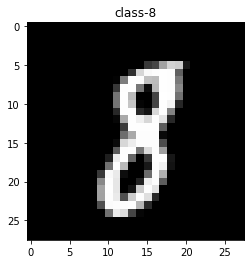

Train image 18089-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  57  70 162
  212 205  25   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  47 214 249 253 254
  253  96   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   3 125 254 253 192 188 254
  253 122   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [12]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = ''

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])

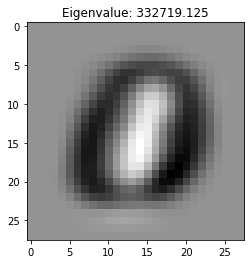

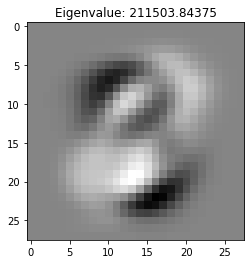

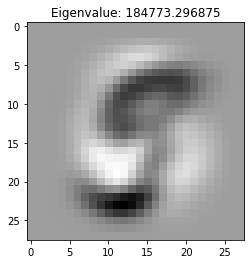

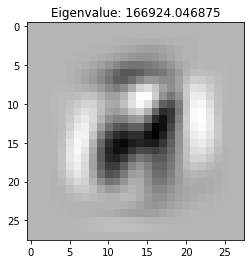

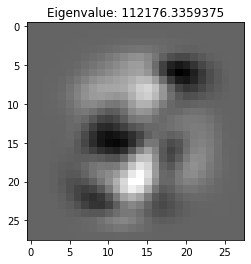

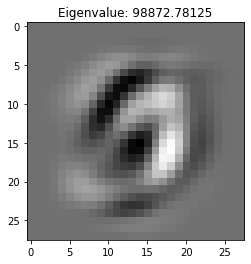

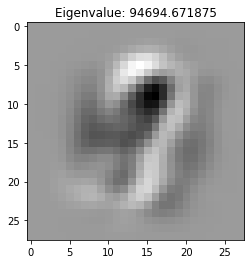

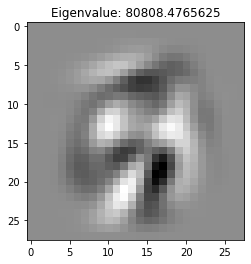

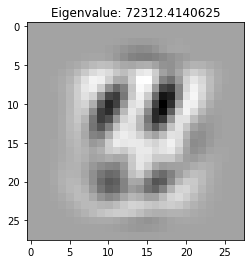

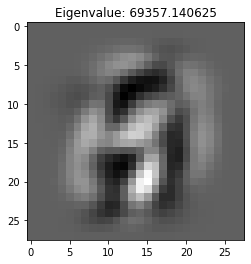

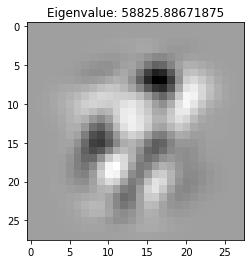

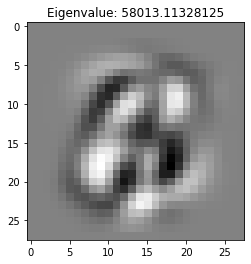

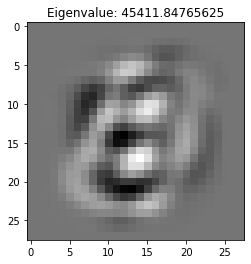

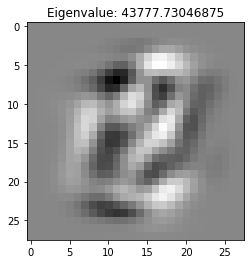

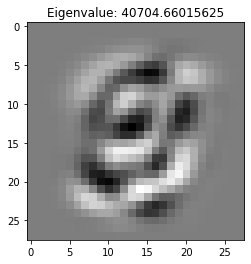

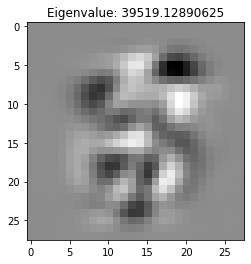

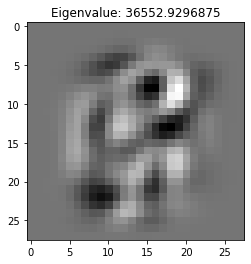

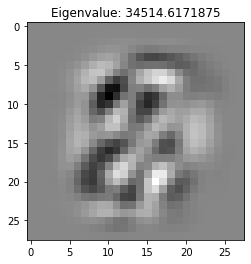

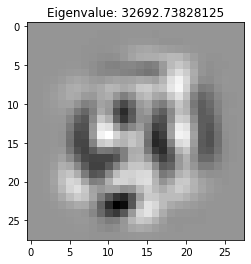

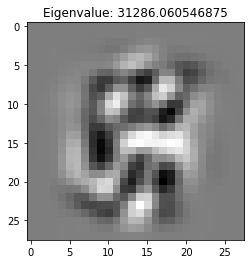

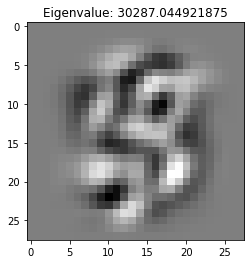

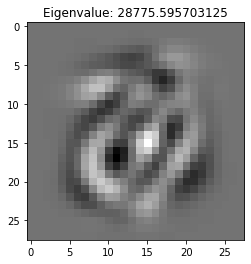

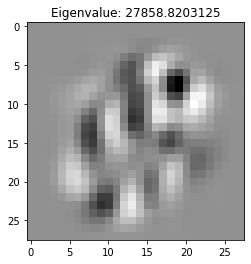

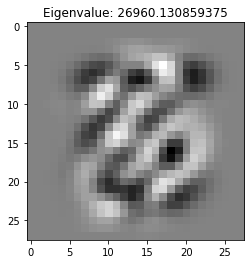

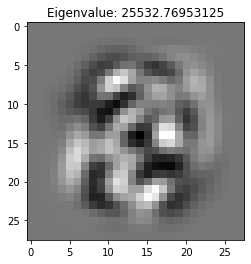

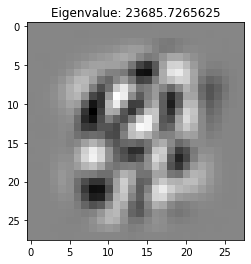

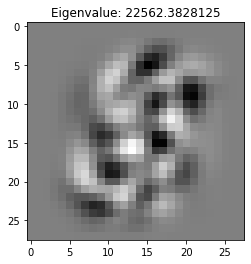

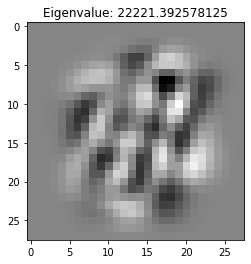

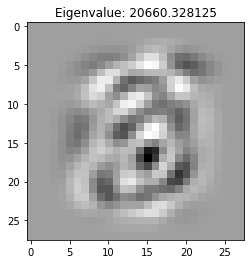

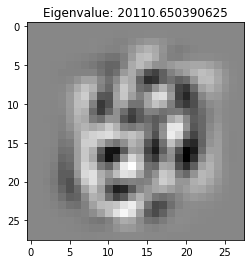

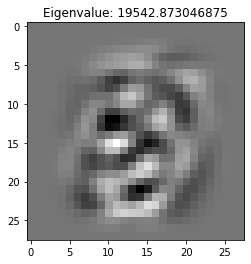

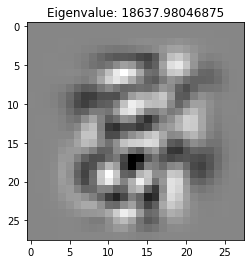

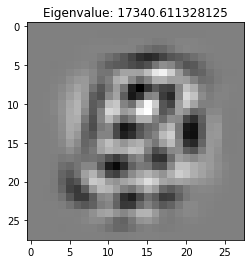

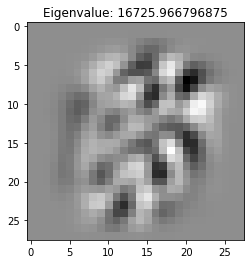

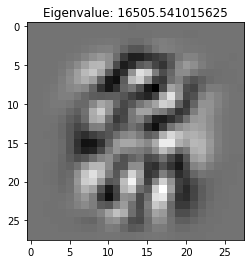

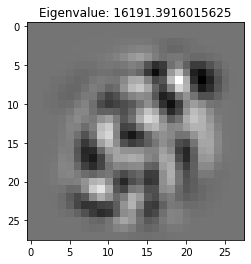

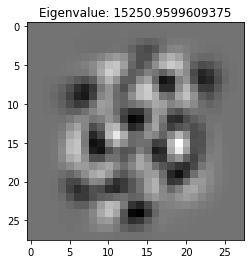

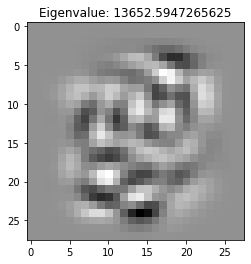

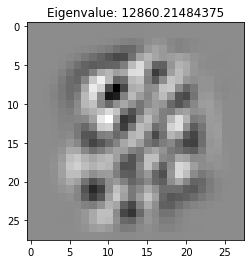

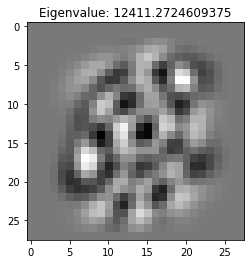

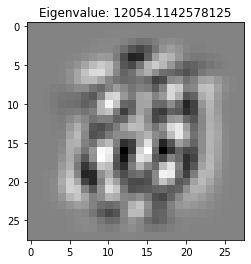

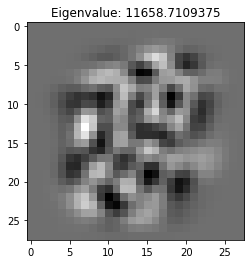

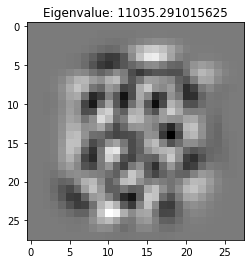

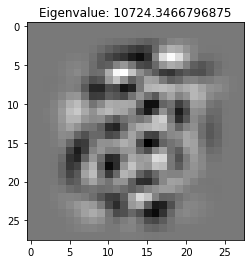

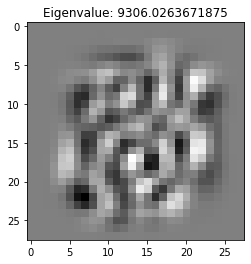

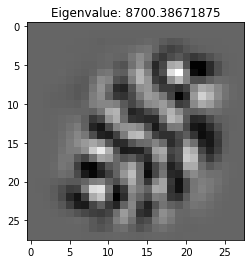

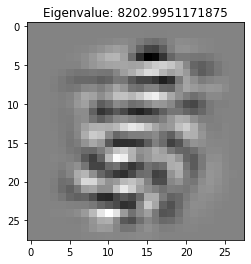

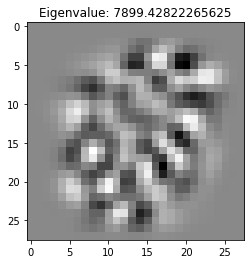

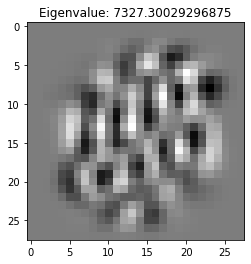

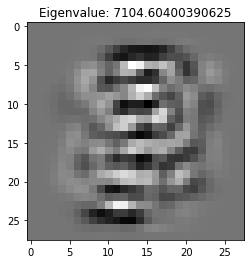

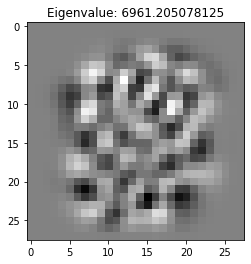

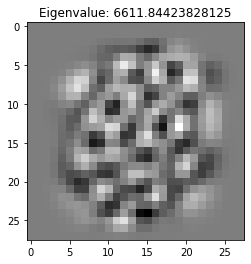

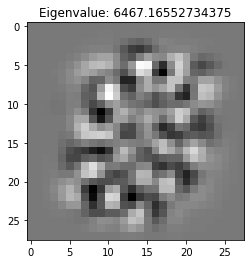

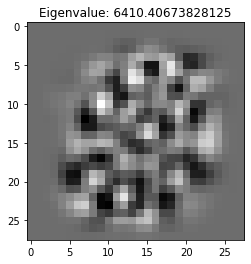

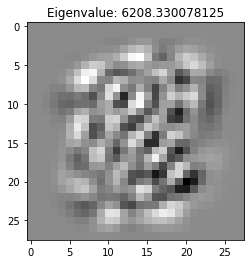

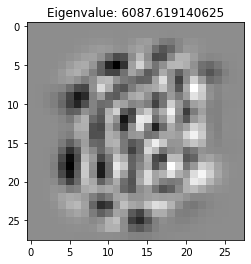

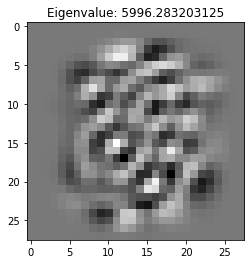

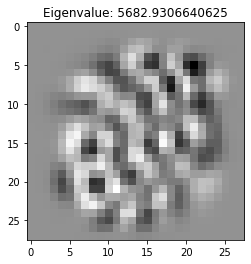

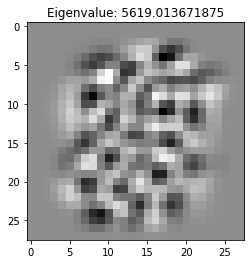

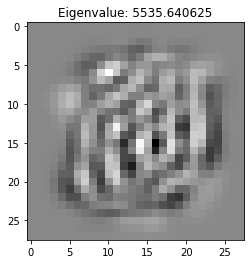

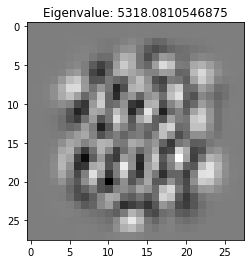

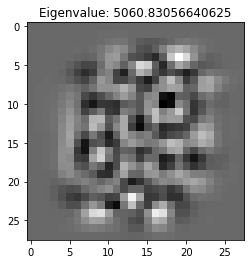

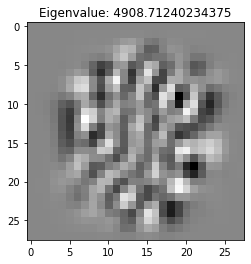

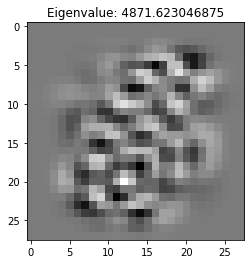

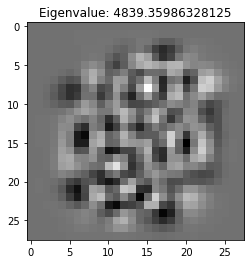

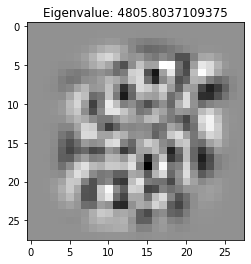

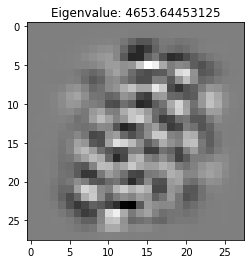

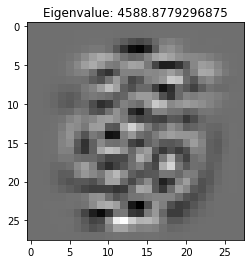

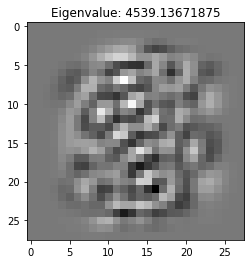

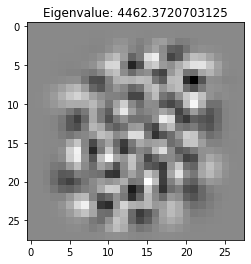

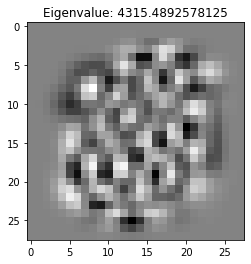

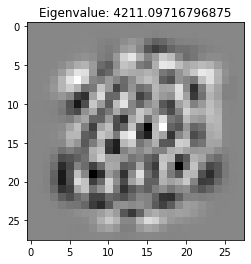

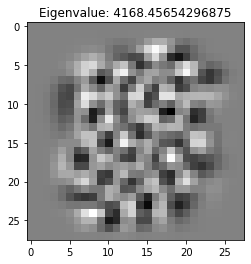

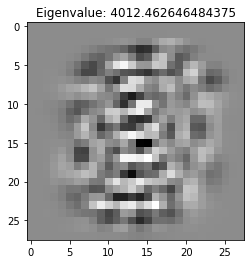

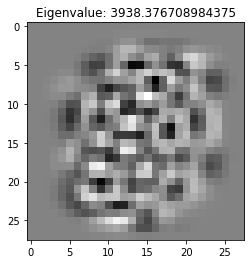

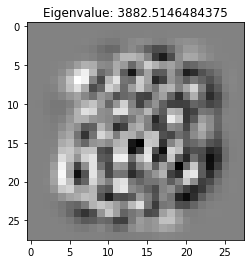

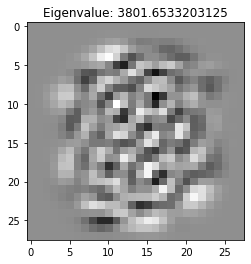

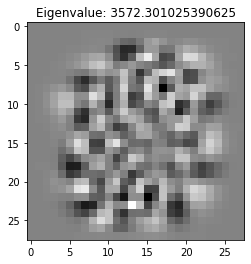

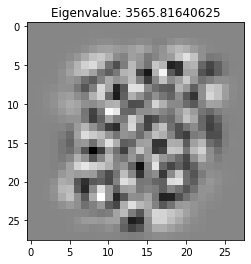

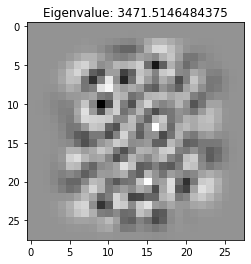

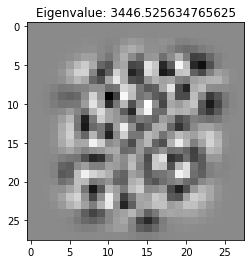

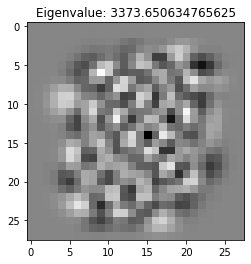

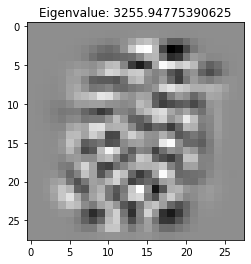

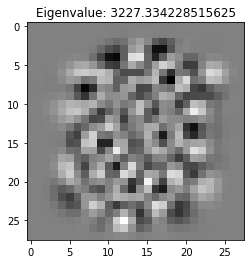

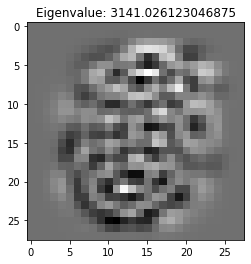

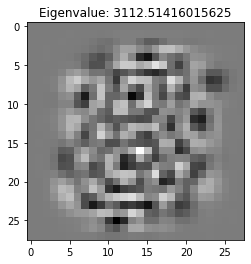

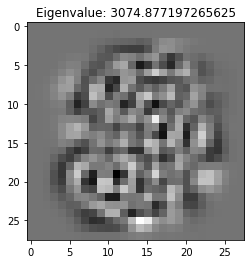

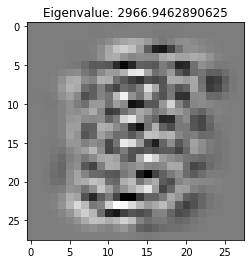

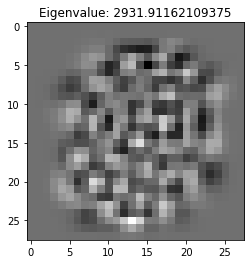

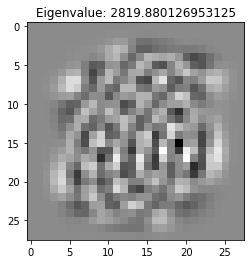

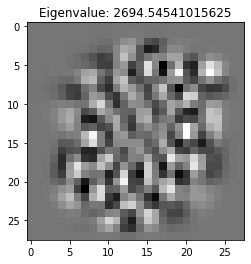

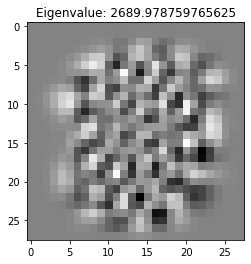

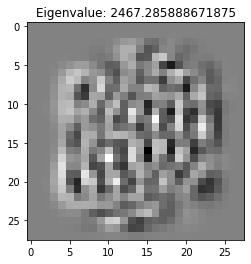

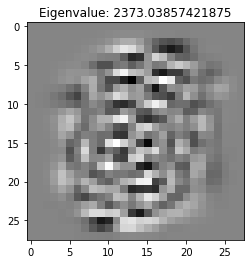

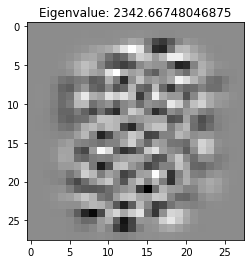

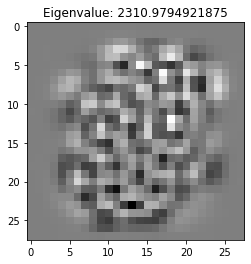

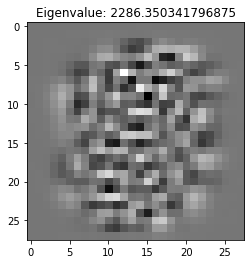

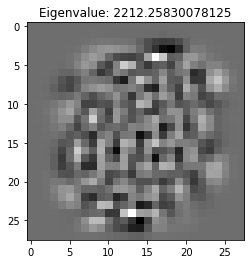

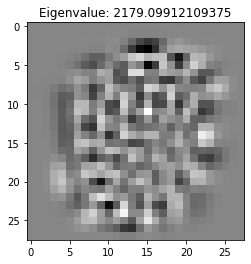

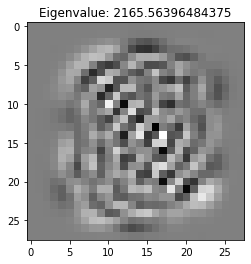

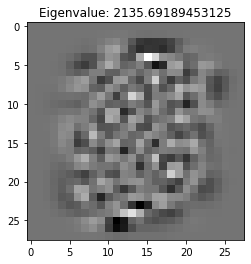

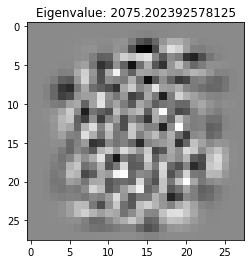

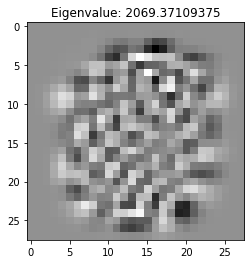

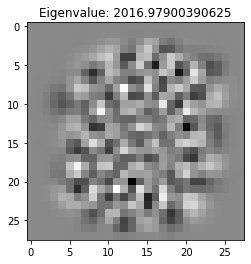

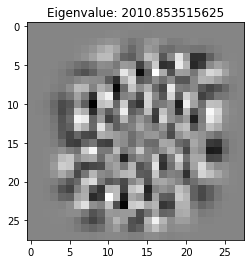

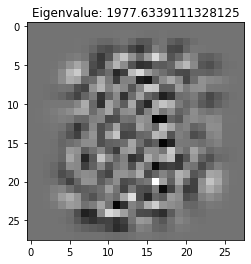

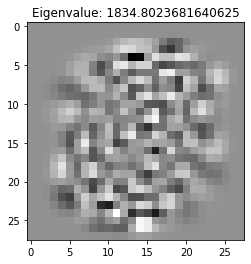

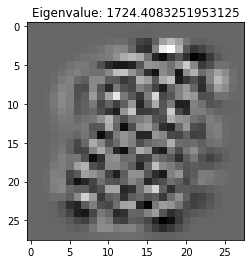

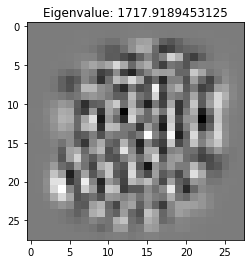

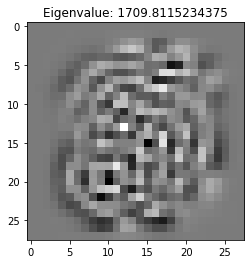

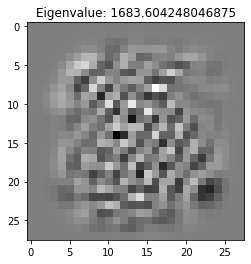

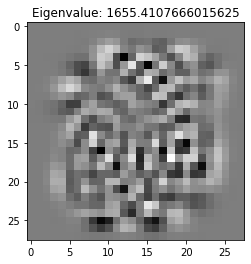

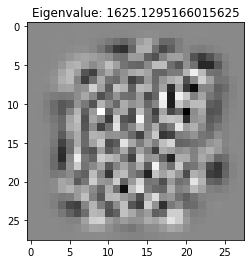

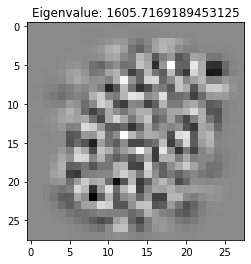

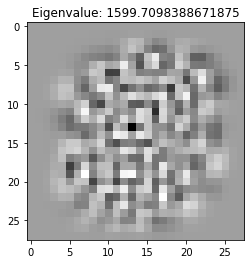

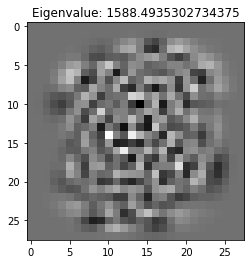

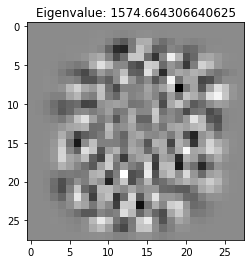

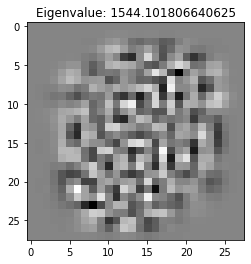

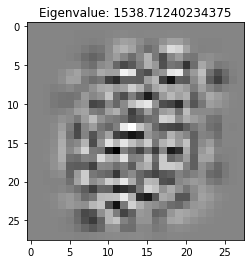

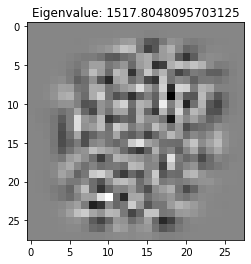

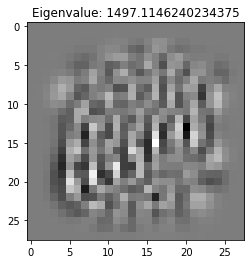

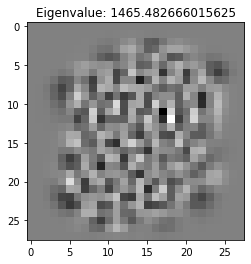

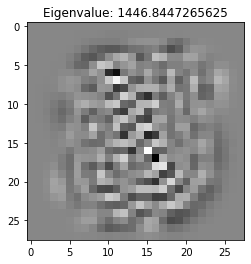

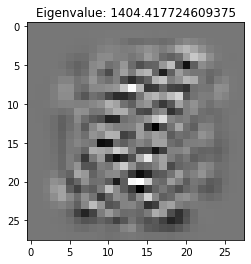

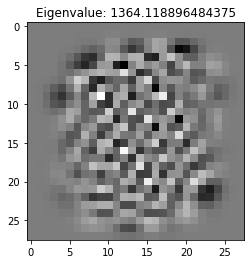

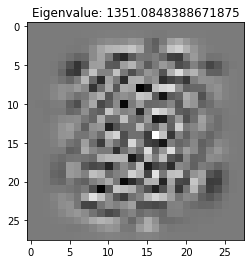

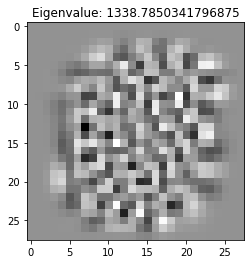

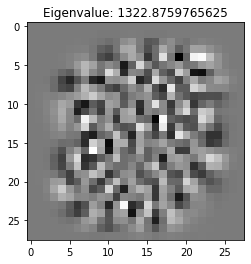

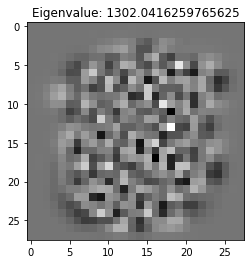

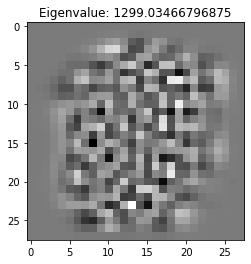

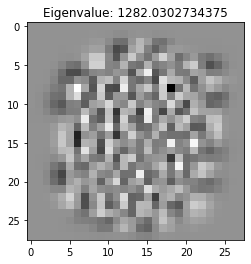

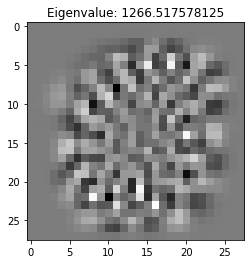

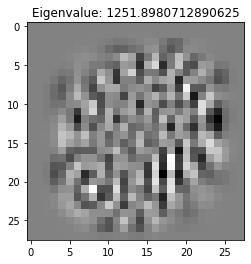

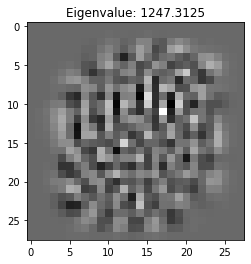

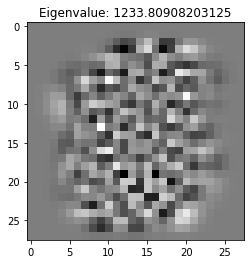

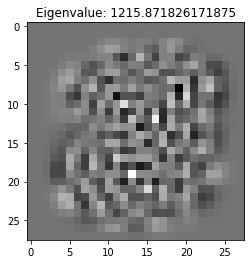

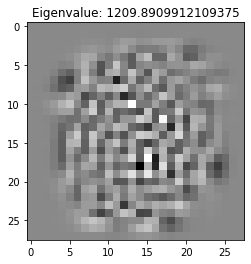

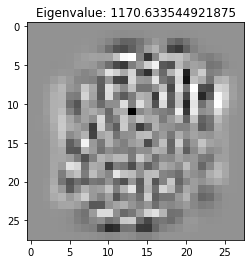

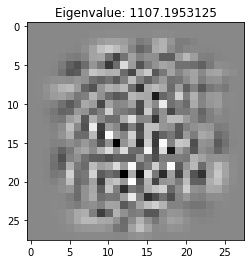

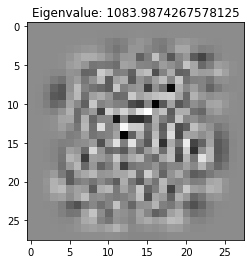

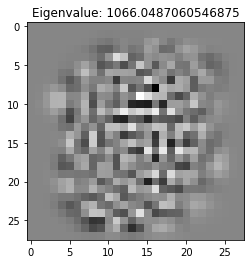

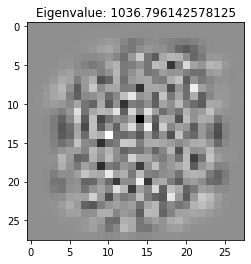

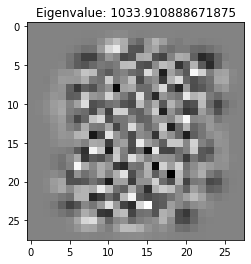

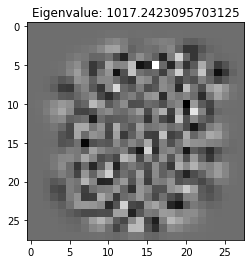

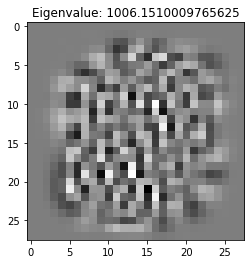

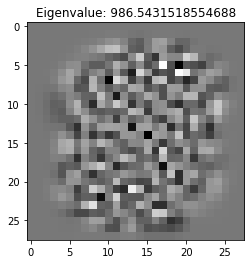

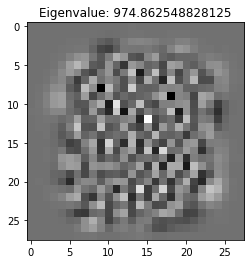

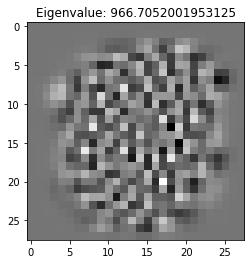

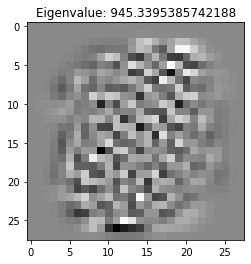

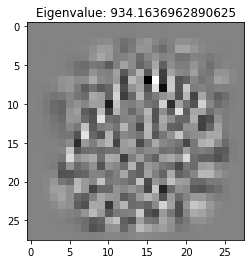

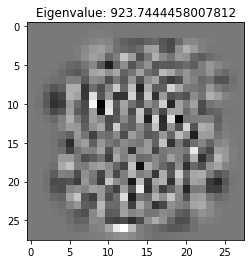

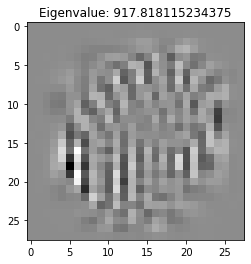

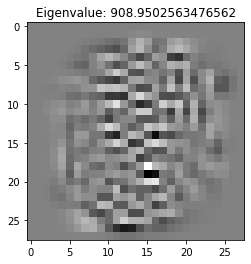

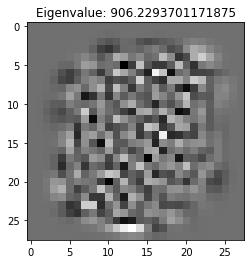

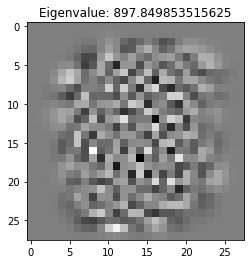

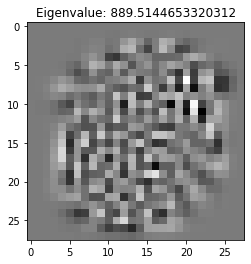

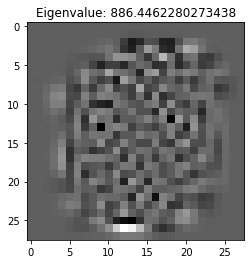

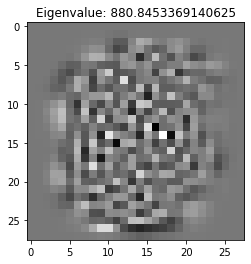

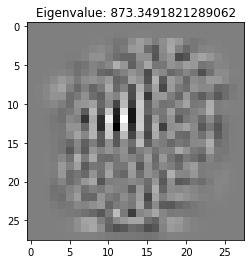

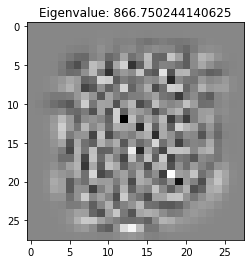

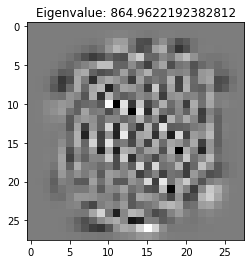

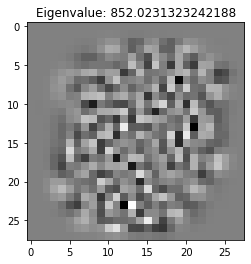

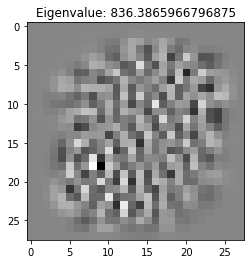

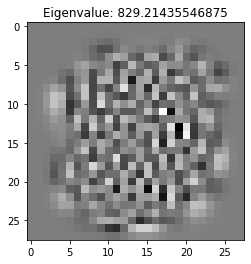

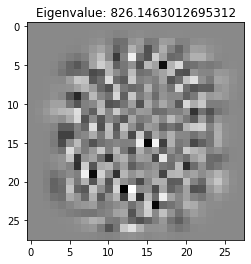

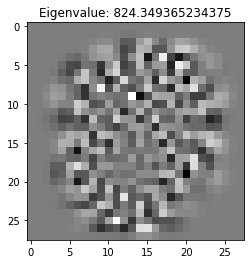

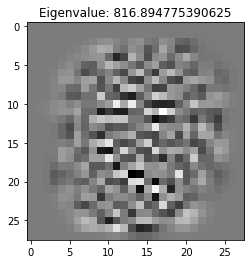

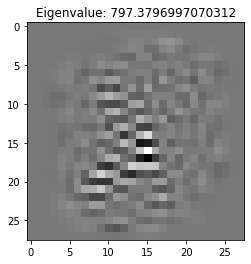

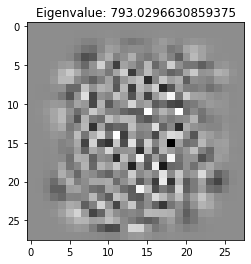

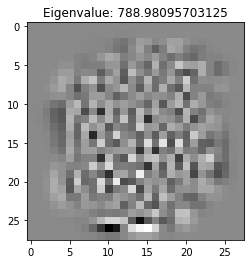

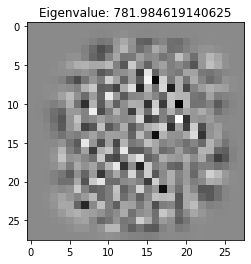

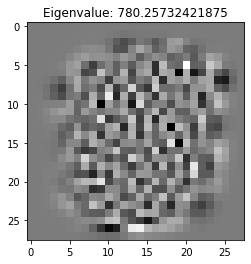

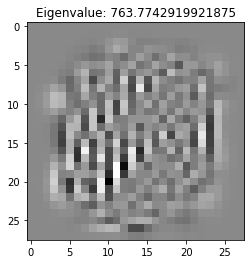

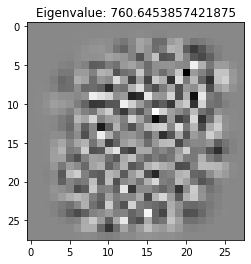

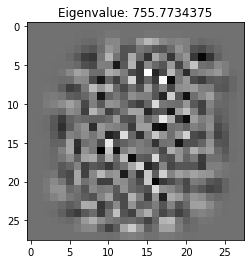

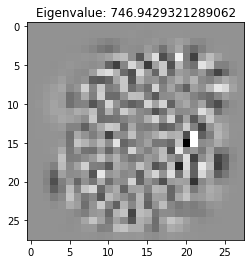

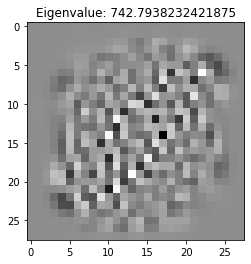

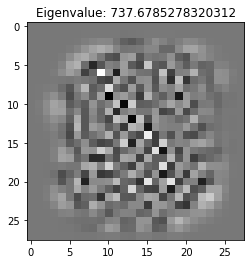

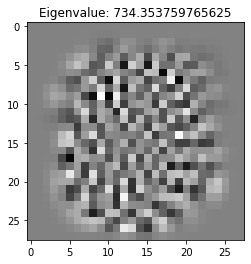

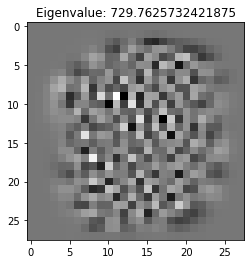

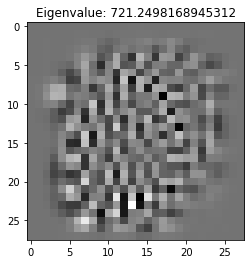

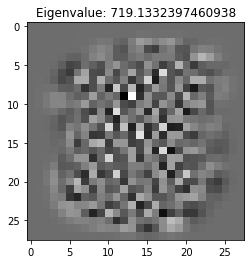

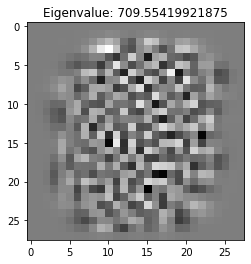

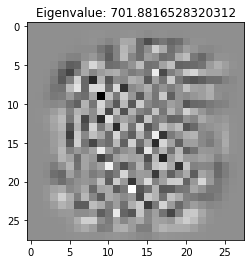

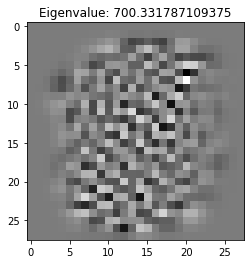

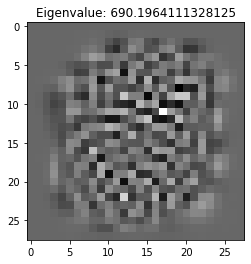

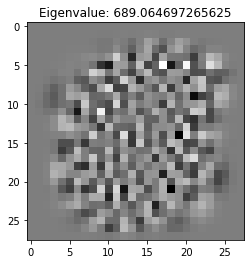

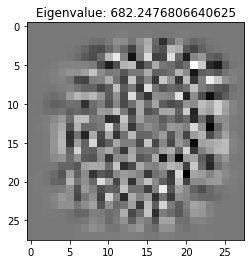

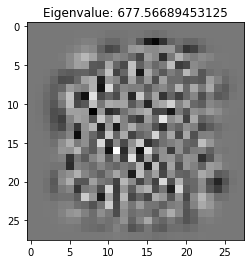

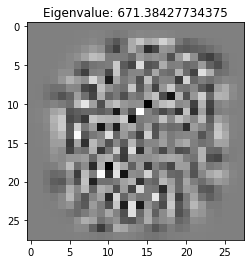

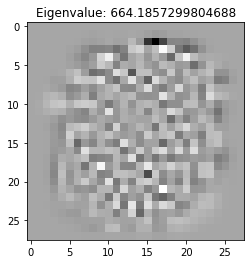

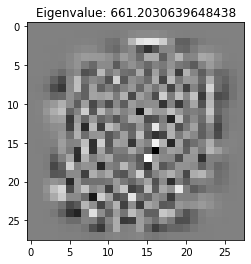

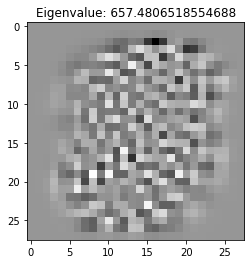

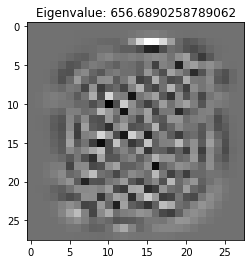

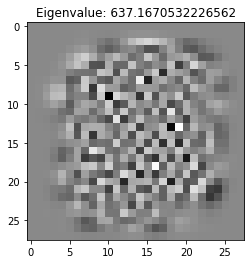

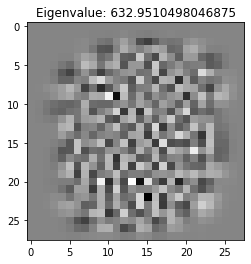

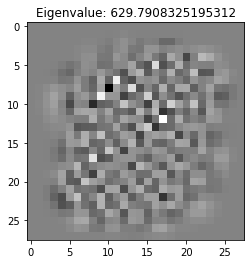

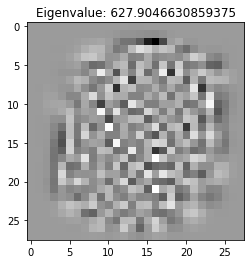

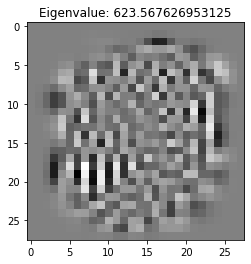

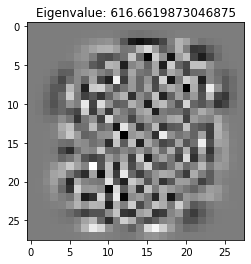

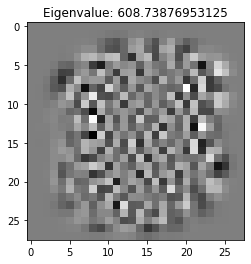

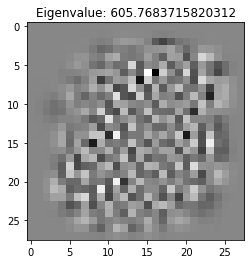

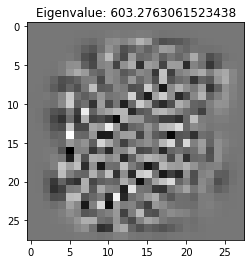

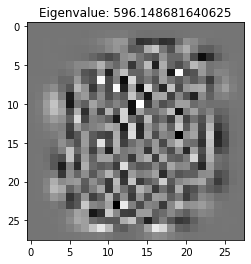

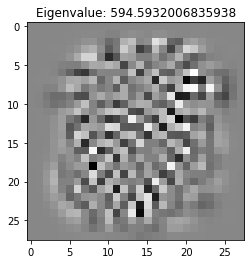

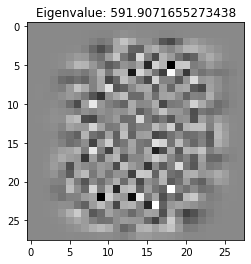

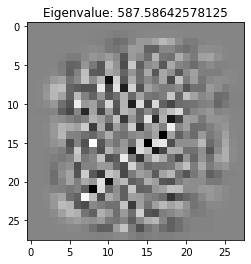

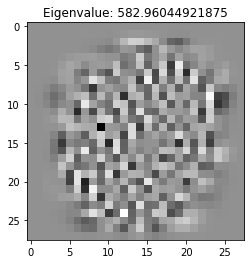

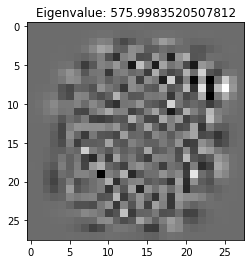

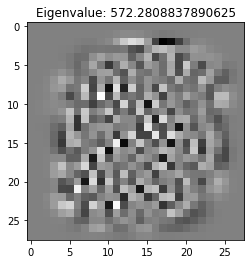

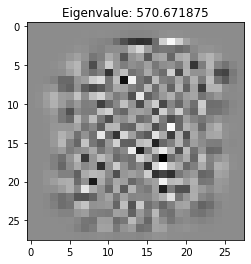

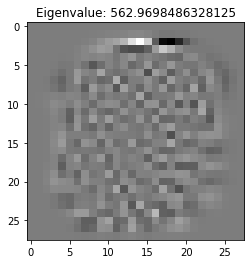

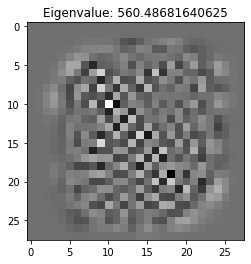

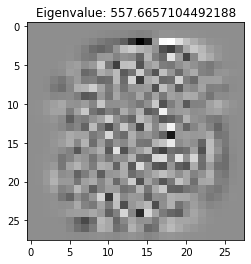

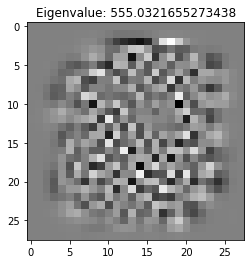

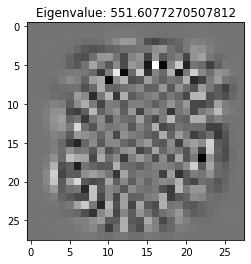

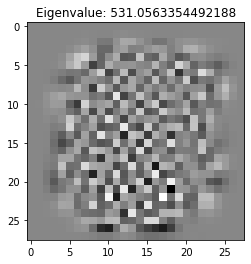

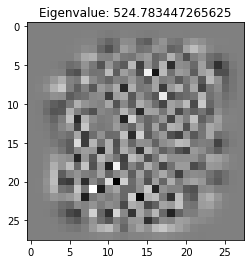

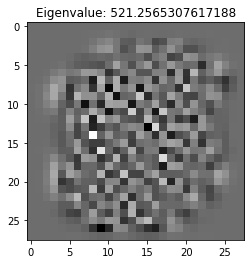

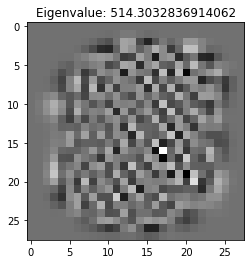

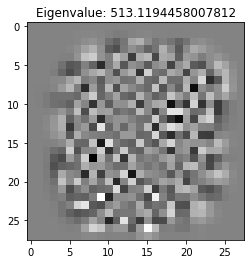

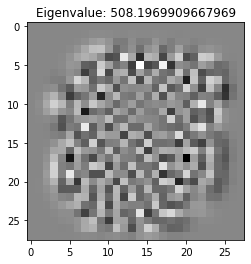

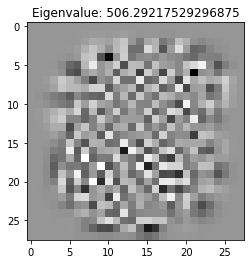

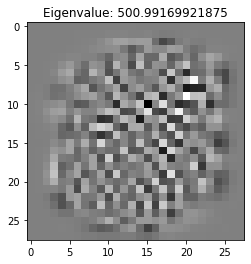

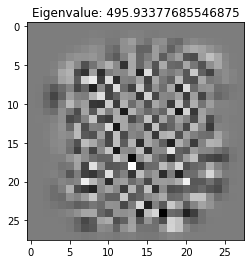

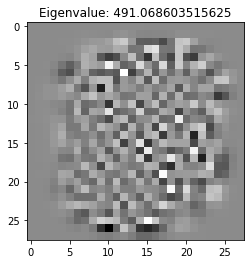

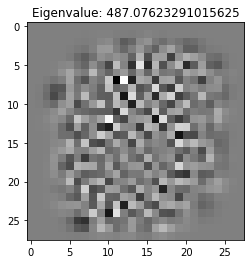

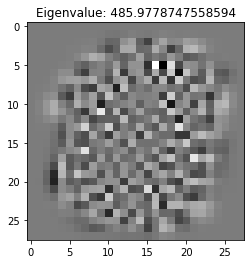

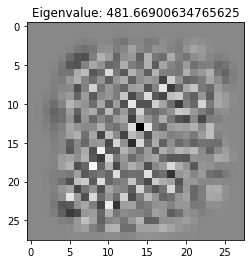

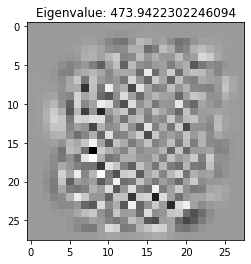

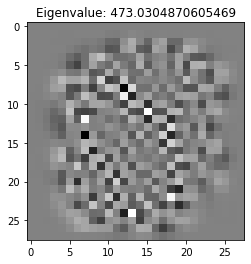

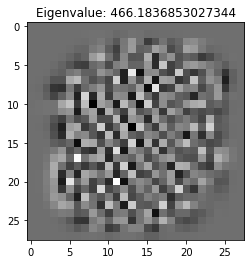

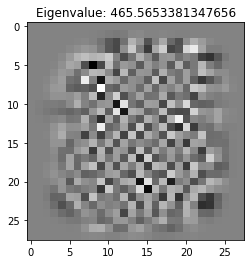

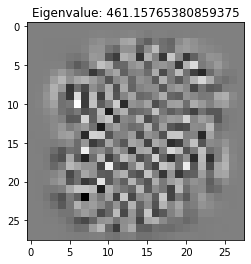

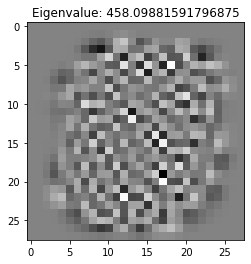

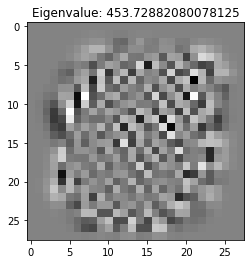

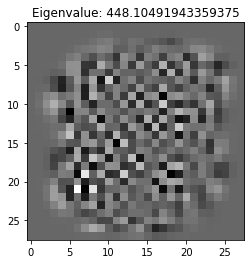

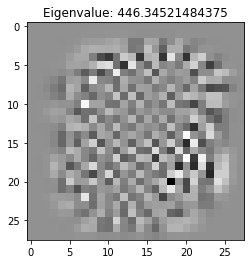

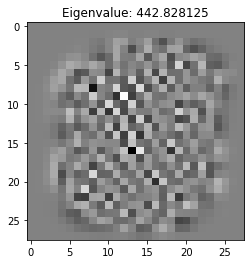

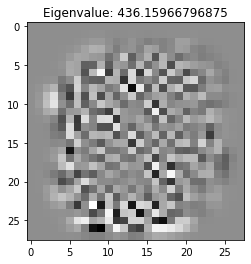

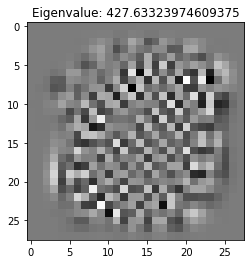

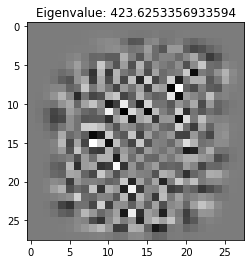

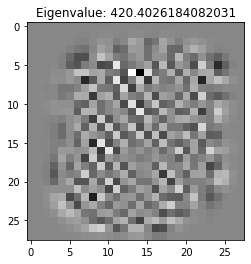

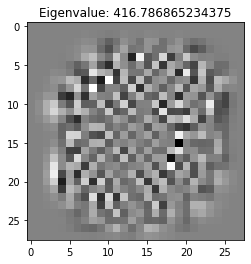

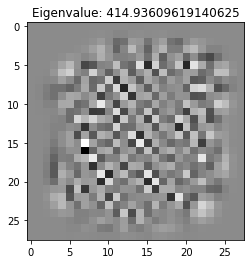

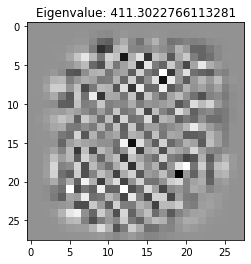

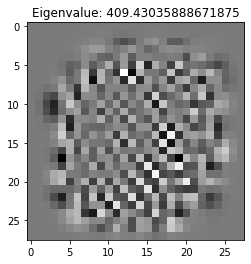

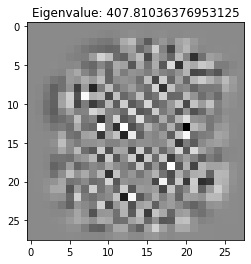

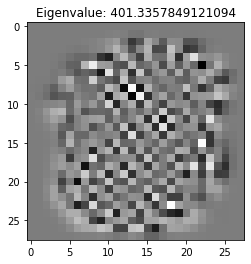

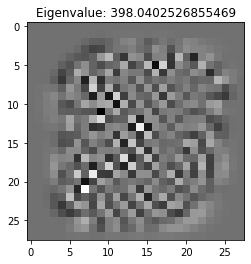

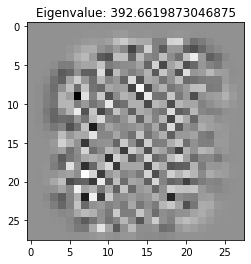

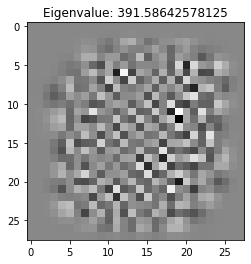

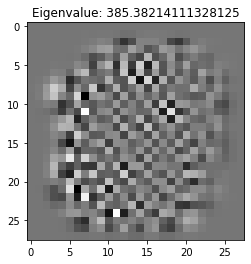

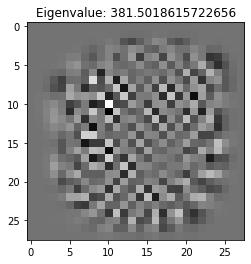

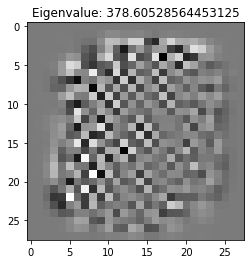

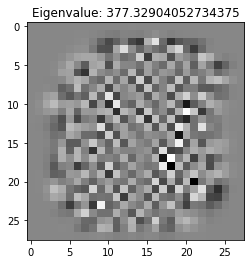

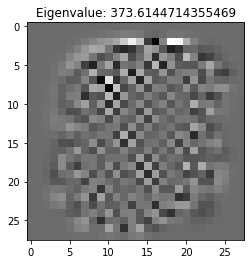

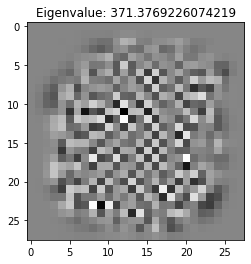

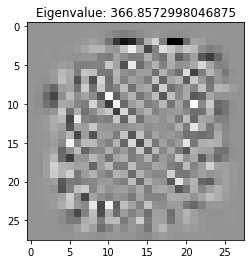

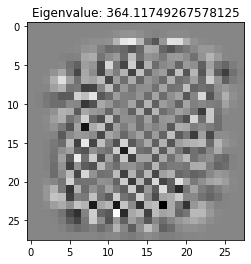

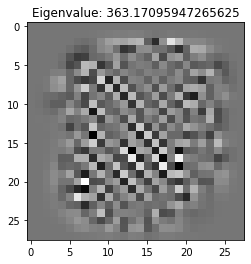

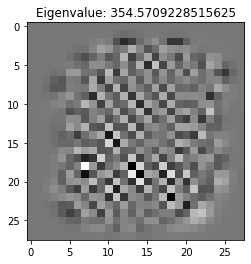

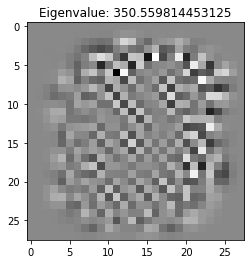

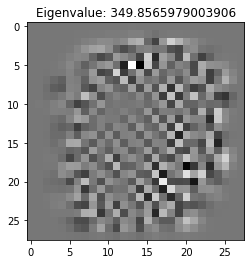

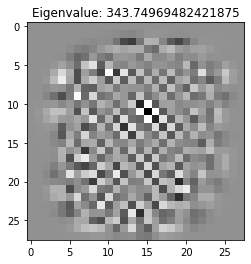

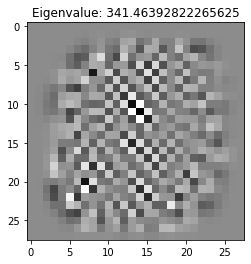

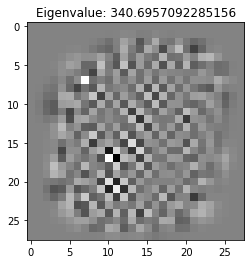

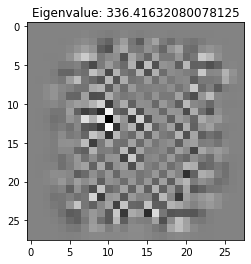

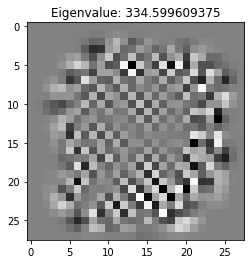

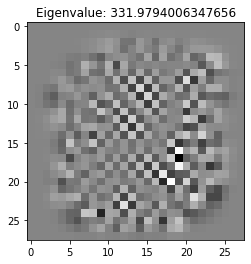

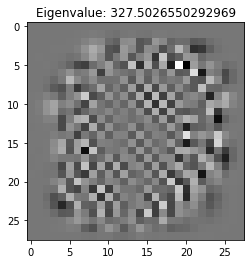

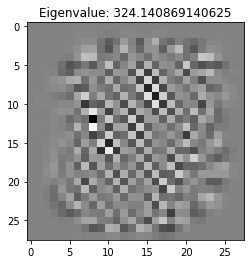

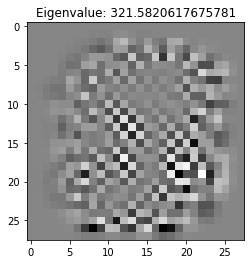

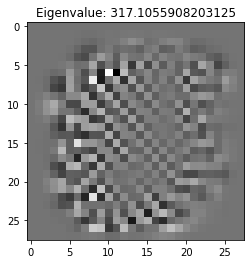

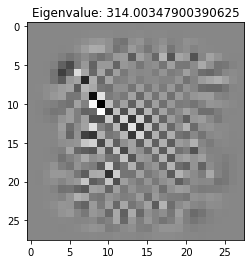

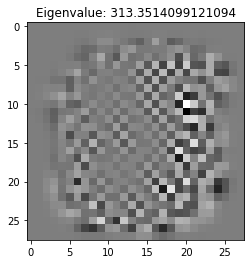

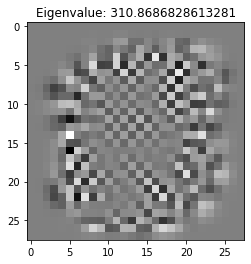

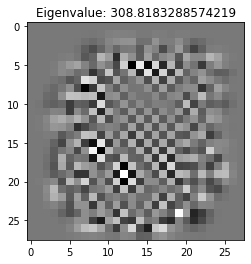

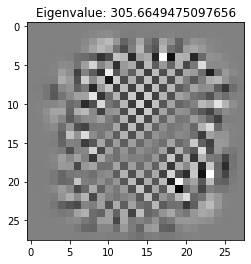

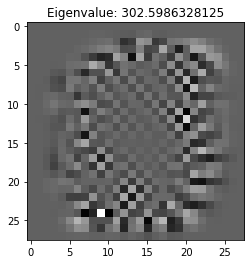

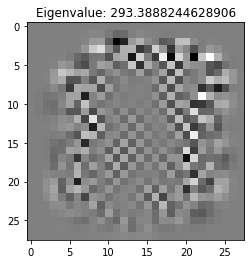

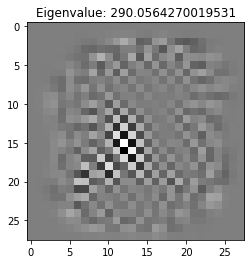

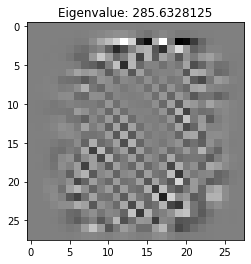

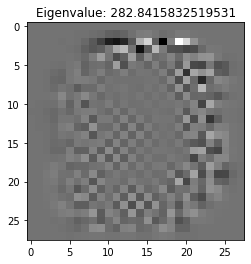

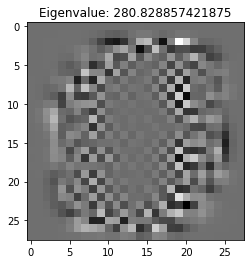

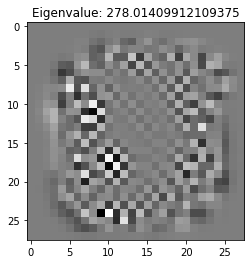

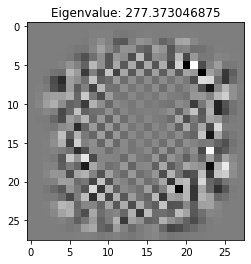

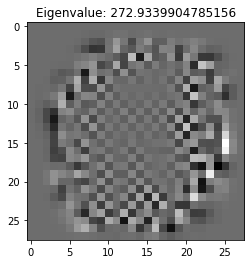

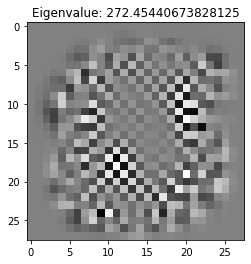

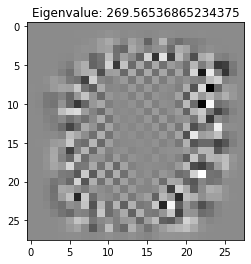

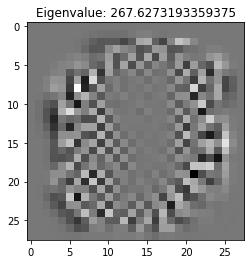

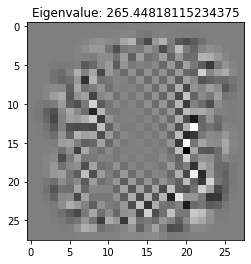

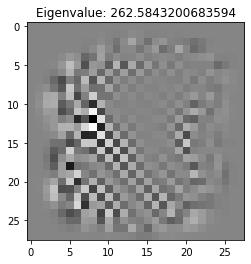

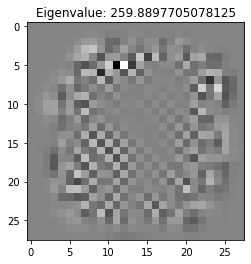

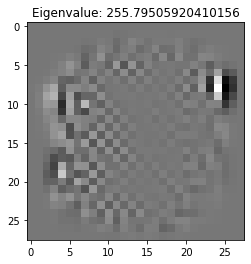

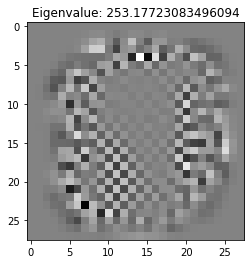

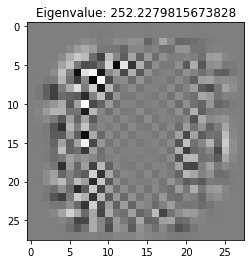

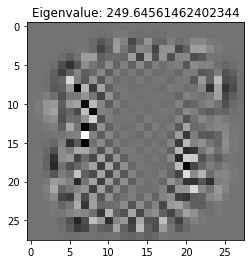

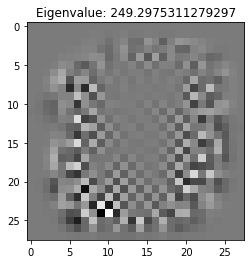

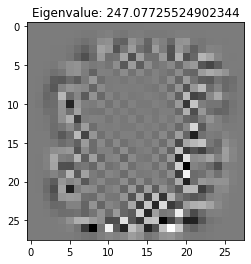

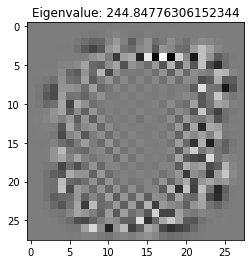

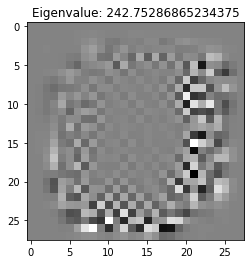

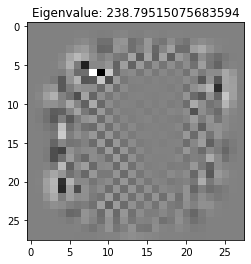

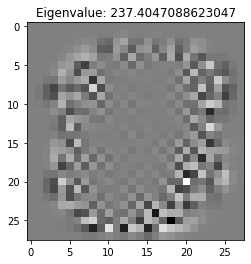

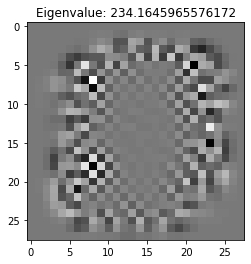

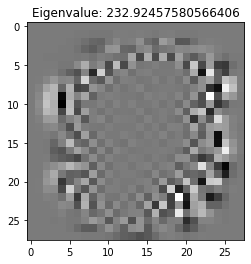

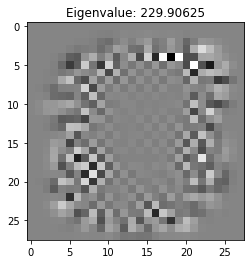

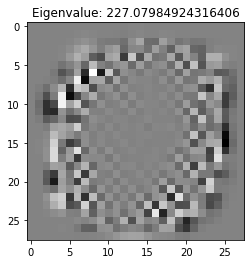

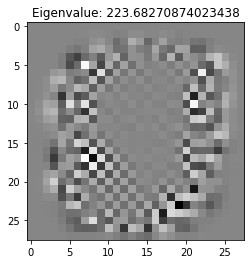

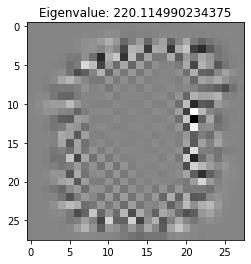

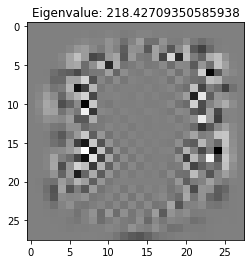

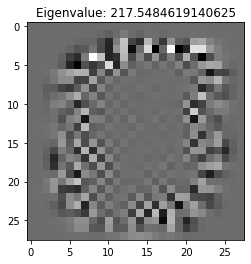

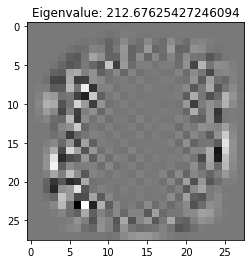

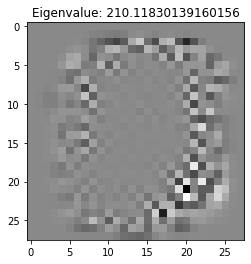

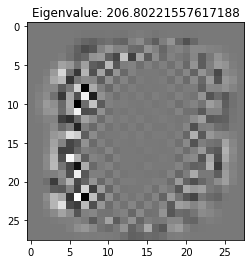

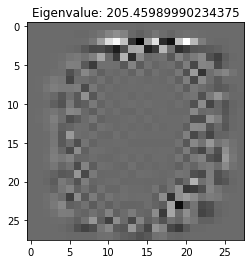

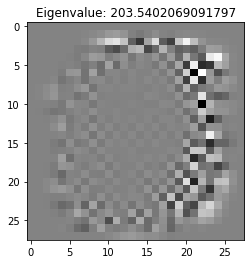

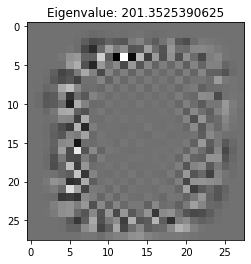

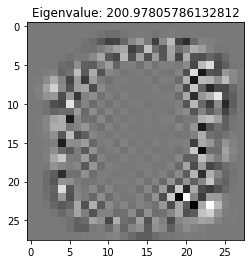

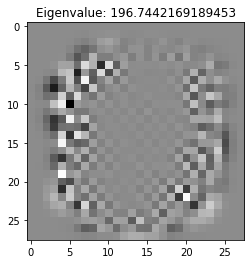

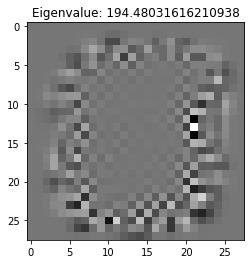

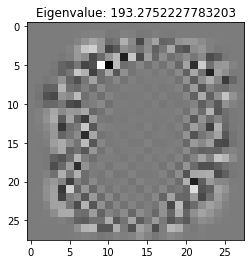

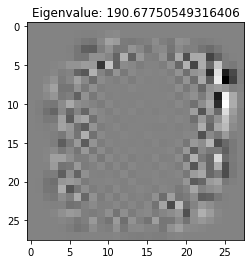

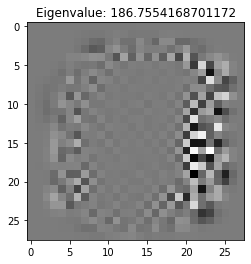

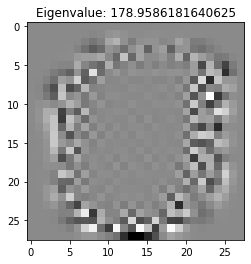

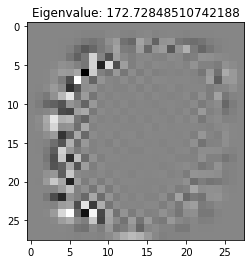

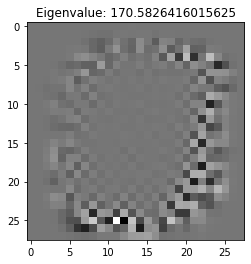

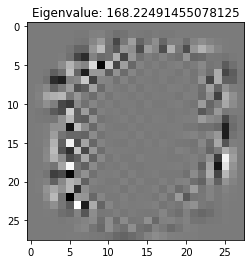

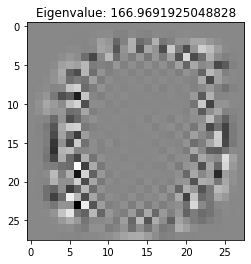

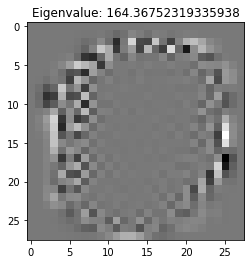

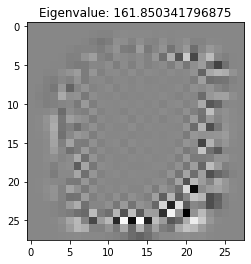

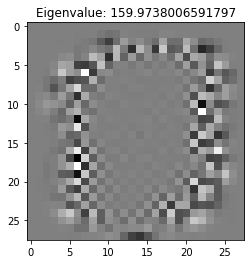

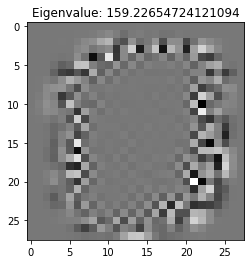

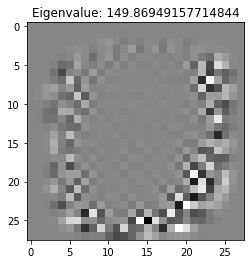

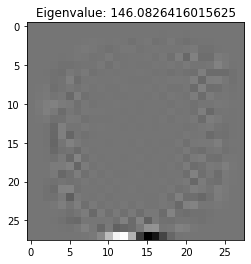

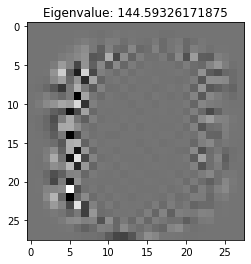

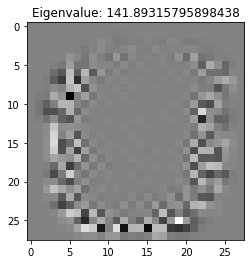

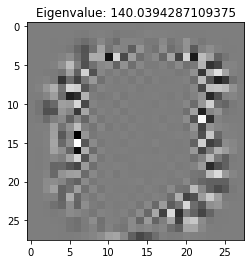

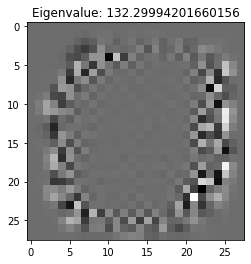

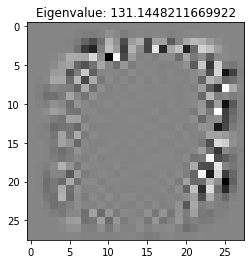

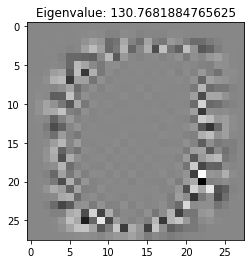

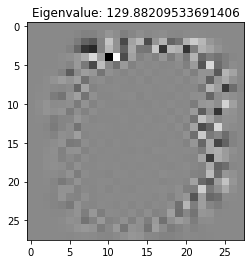

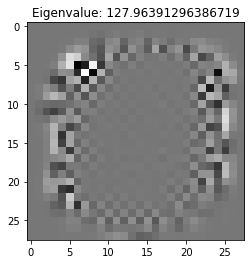

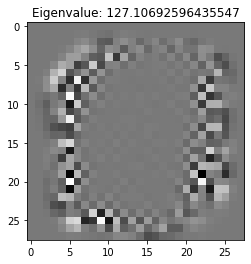

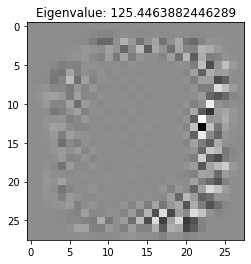

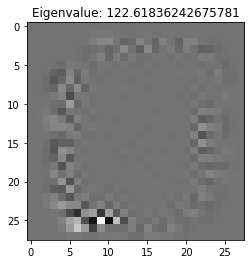

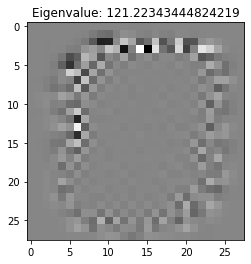

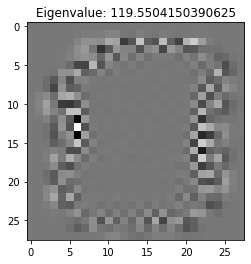

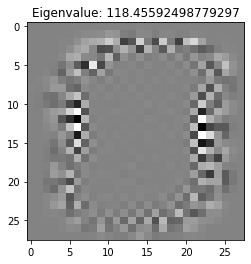

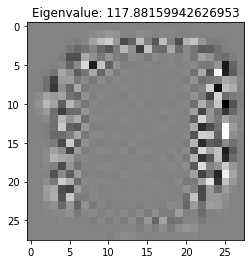

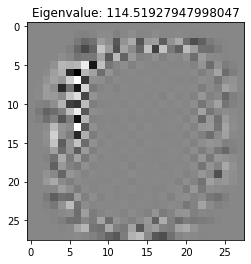

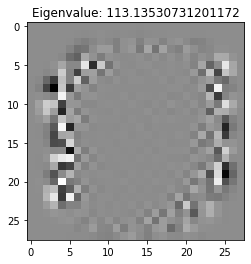

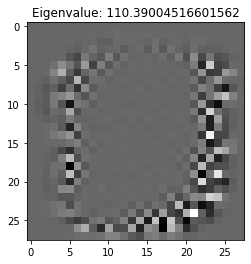

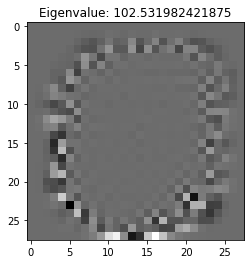

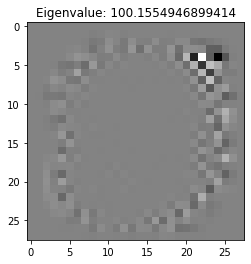

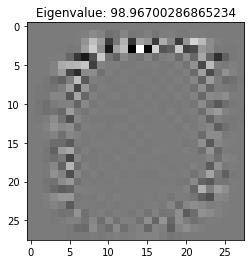

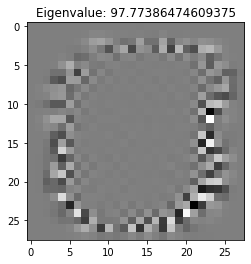

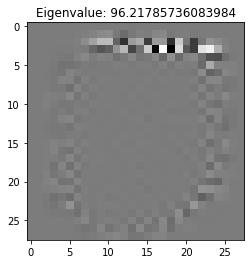

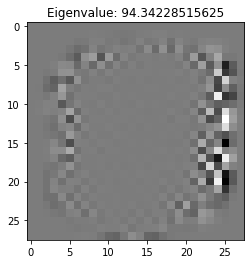

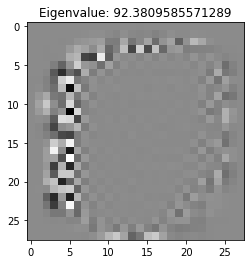

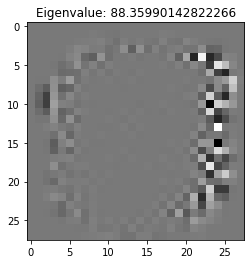

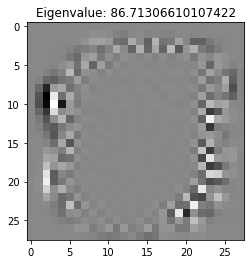

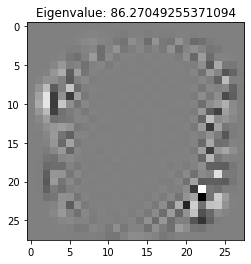

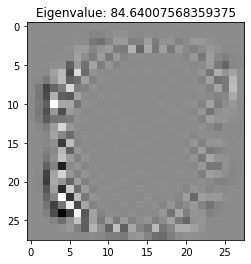

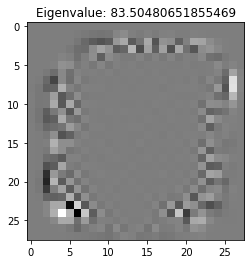

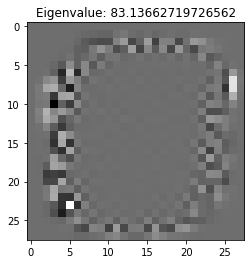

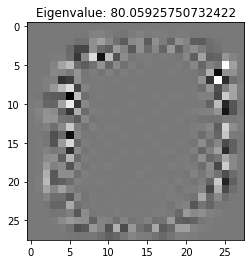

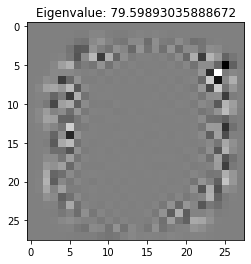

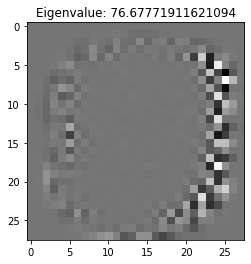

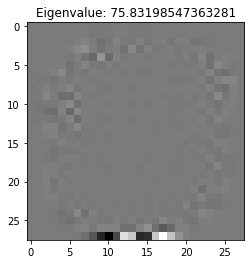

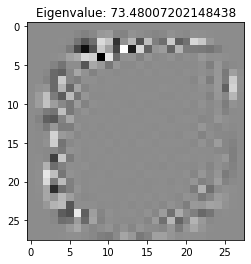

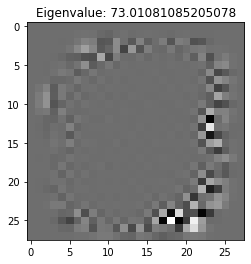

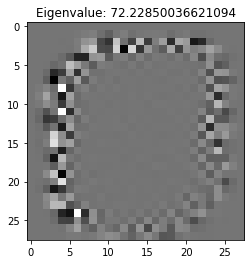

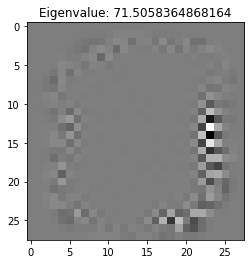

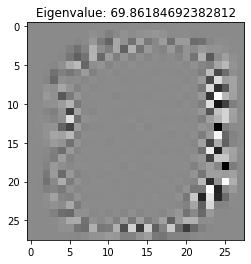

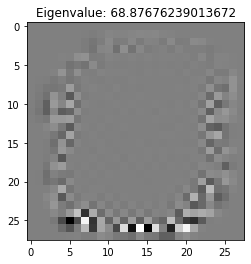

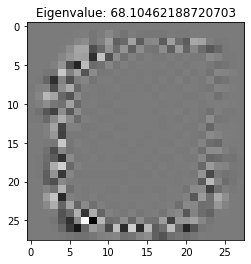

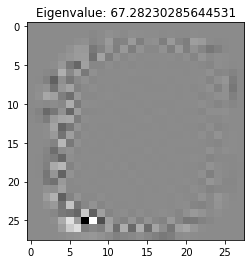

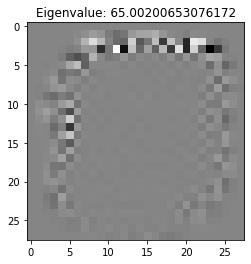

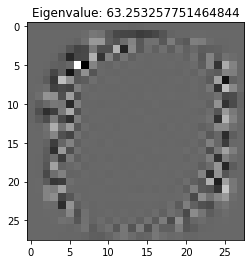

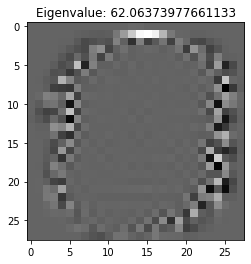

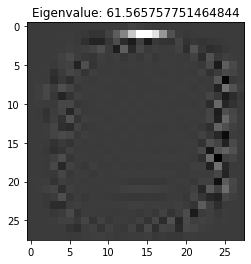

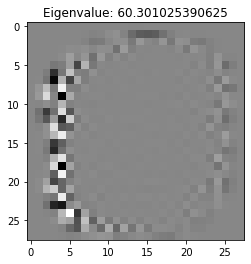

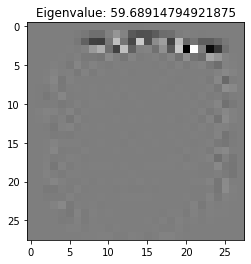

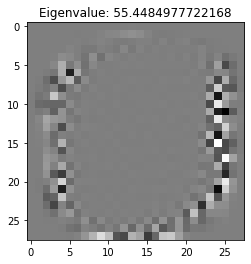

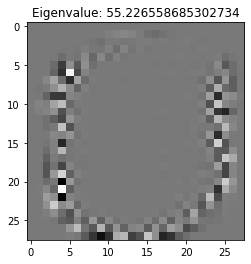

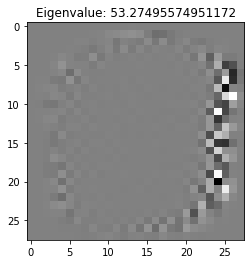

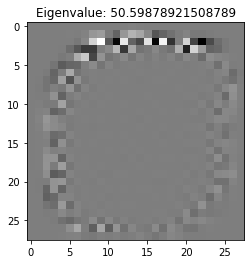

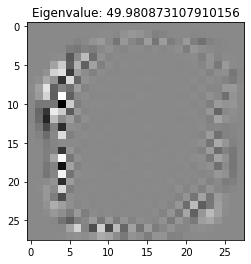

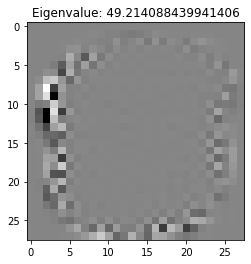

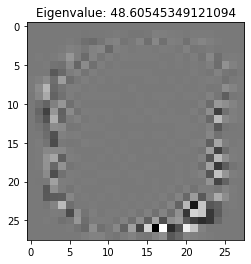

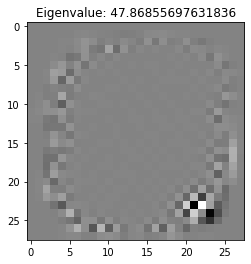

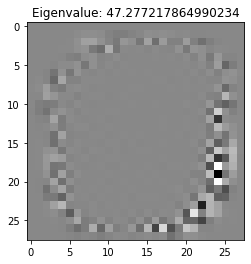

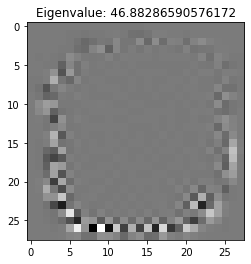

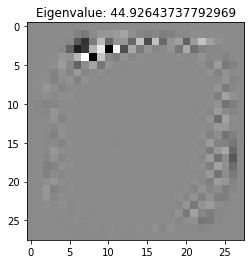

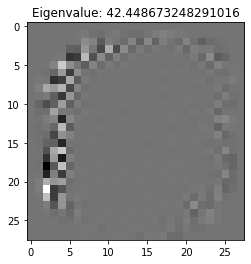

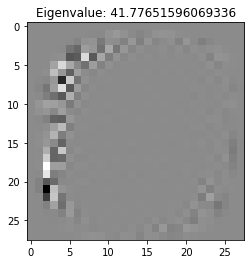

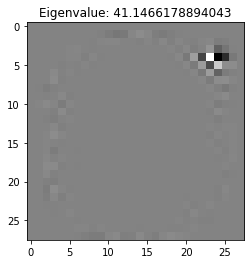

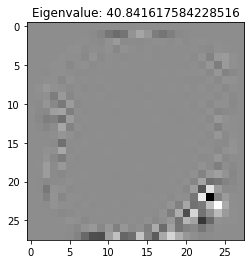

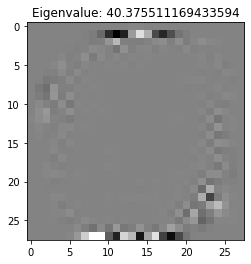

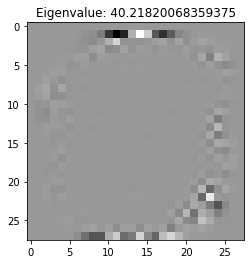

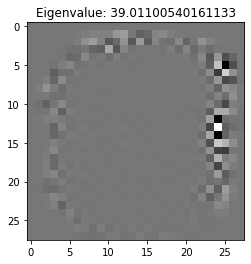

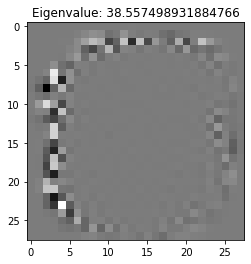

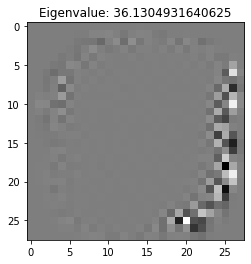

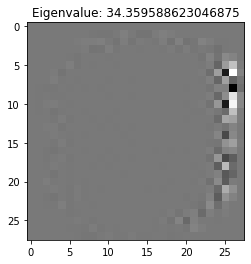

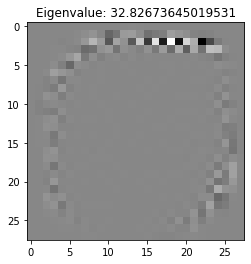

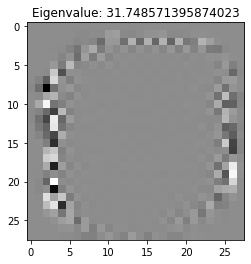

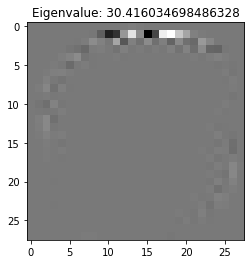

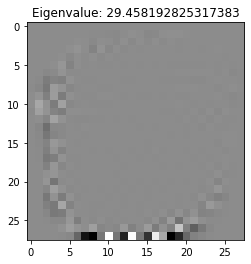

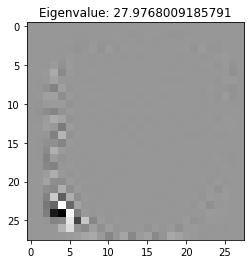

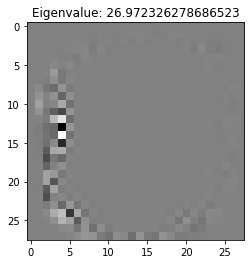

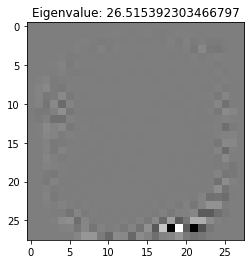

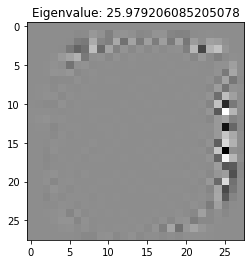

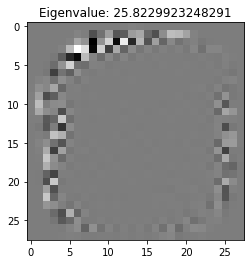

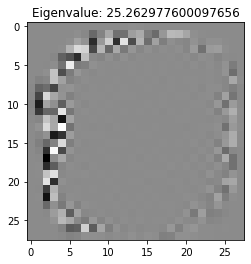

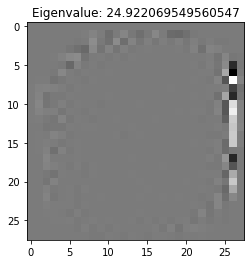

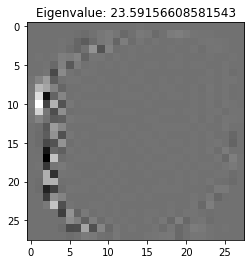

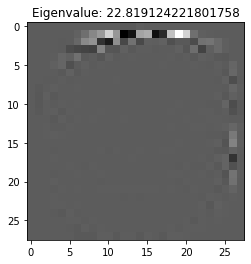

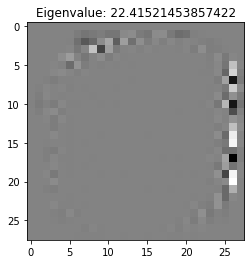

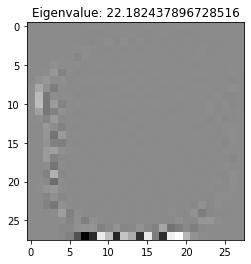

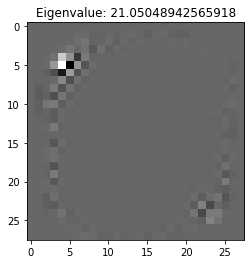

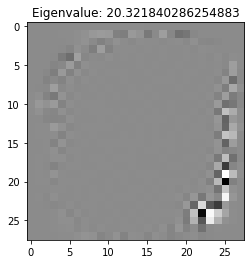

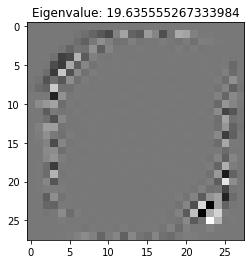

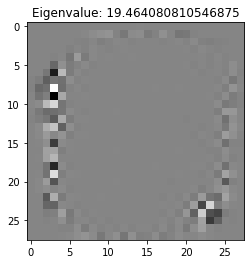

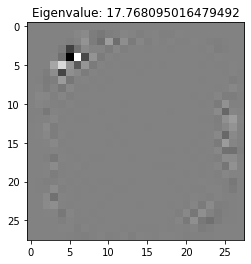

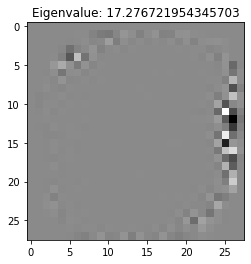

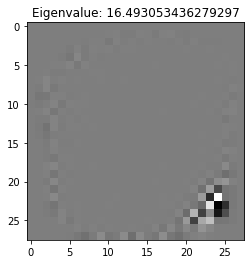

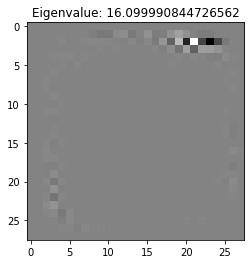

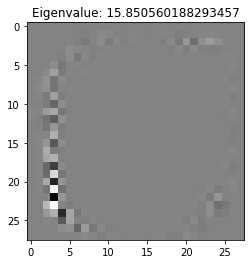

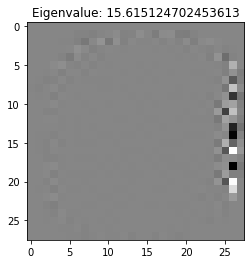

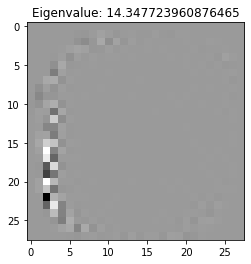

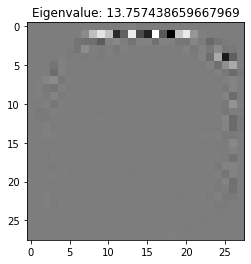

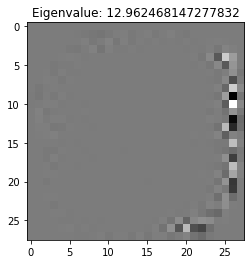

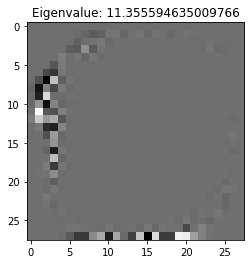

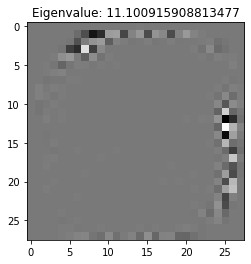

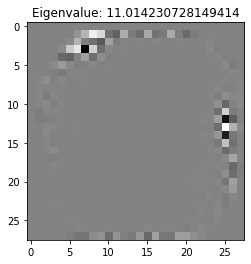

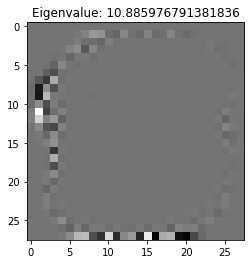

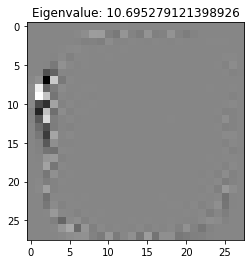

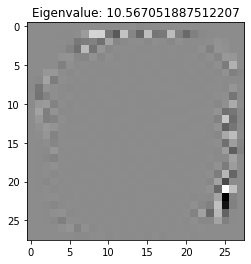

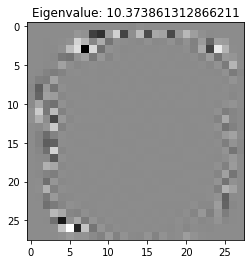

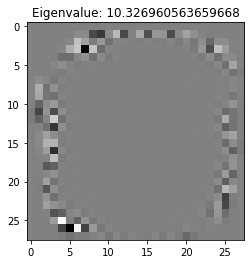

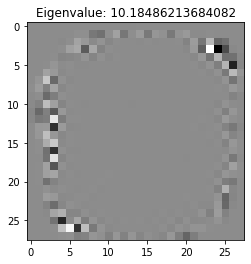

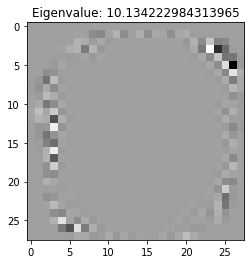

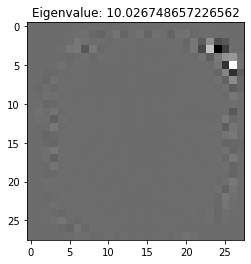

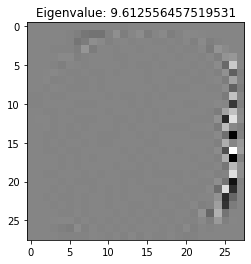

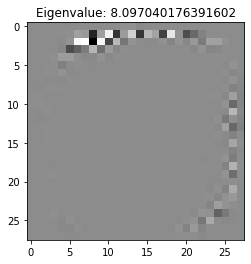

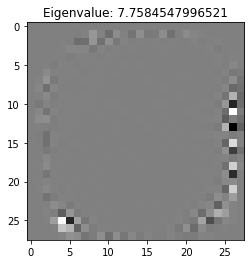

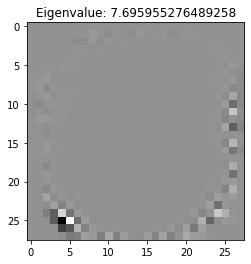

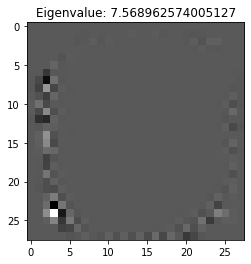

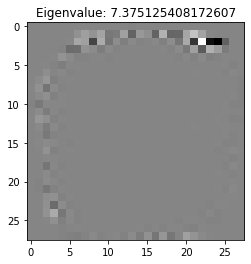

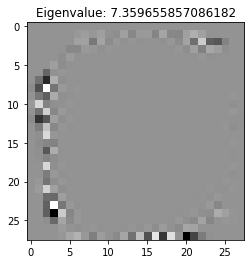

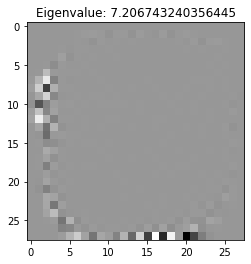

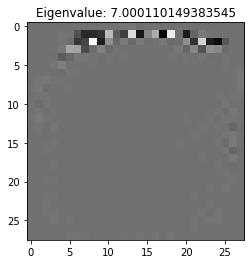

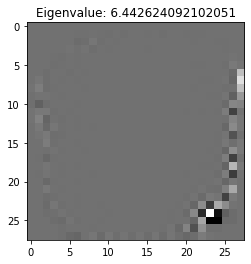

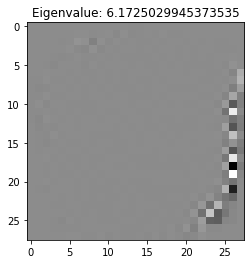

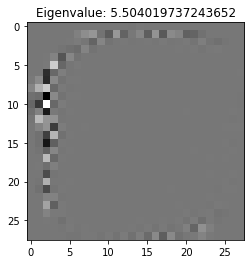

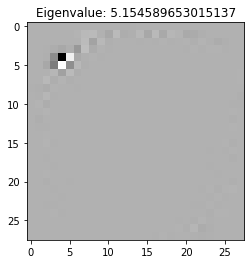

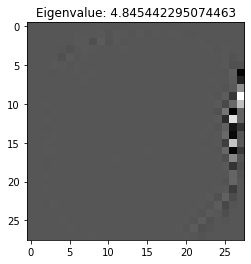

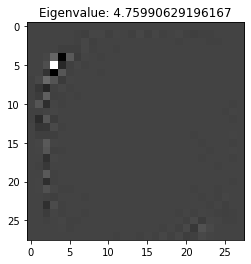

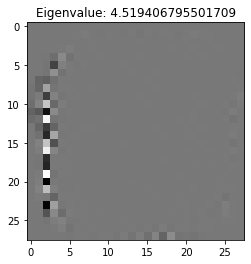

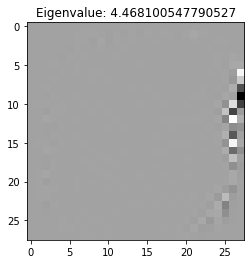

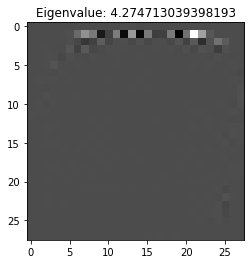

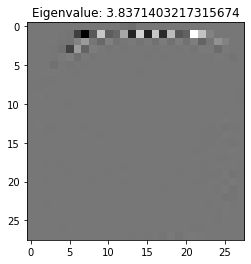

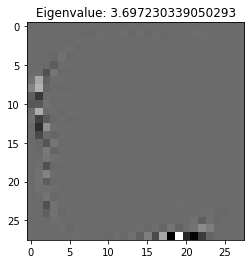

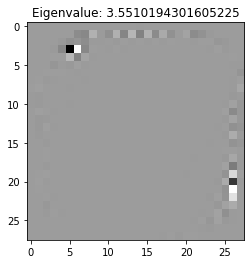

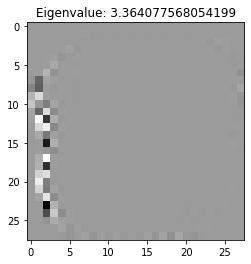

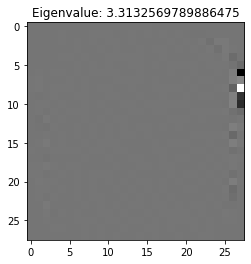

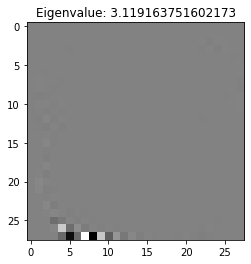

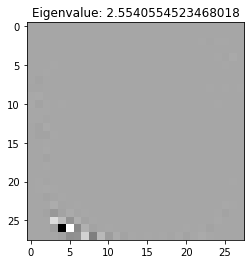

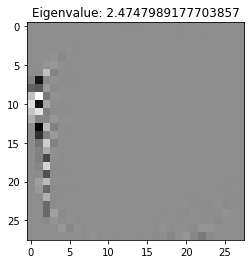

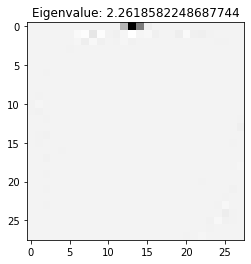

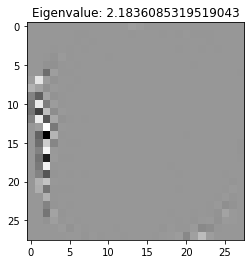

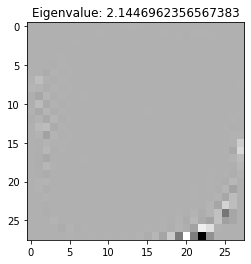

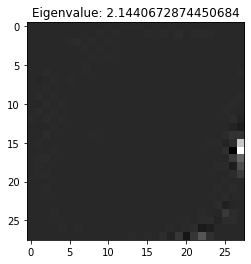

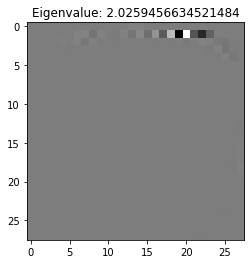

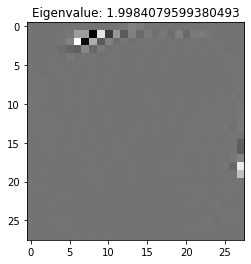

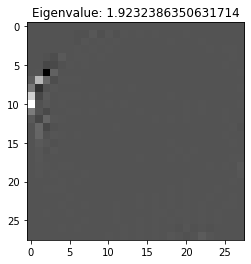

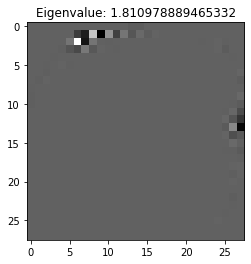

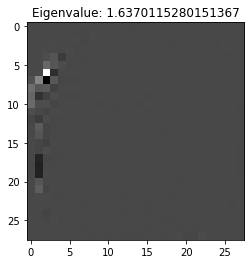

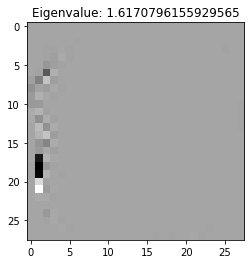

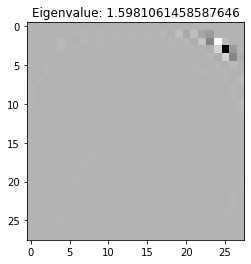

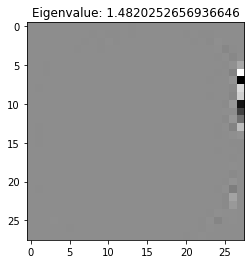

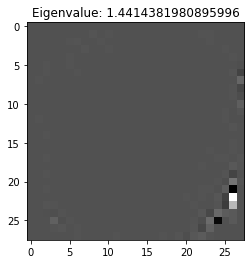

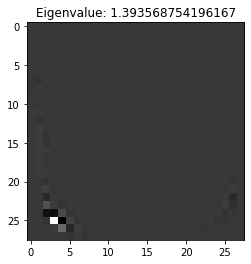

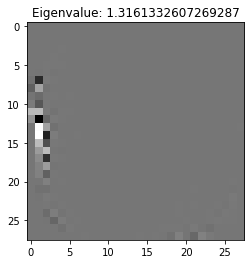

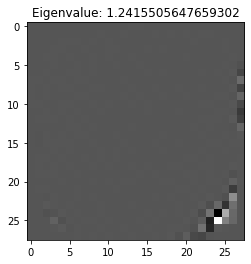

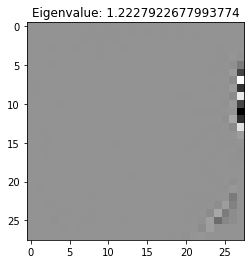

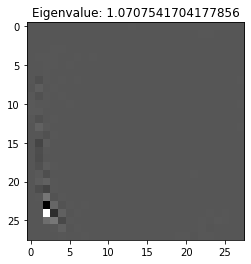

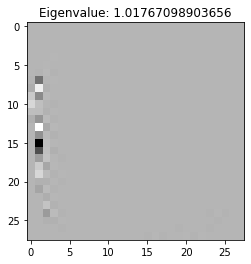

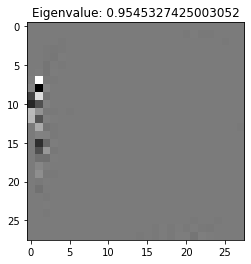

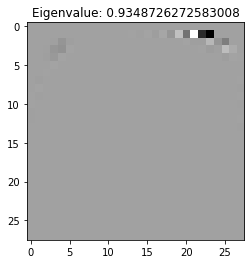

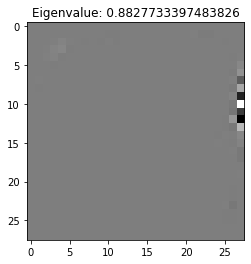

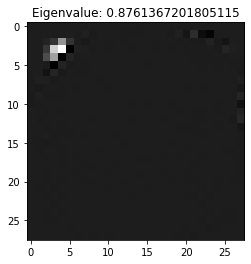

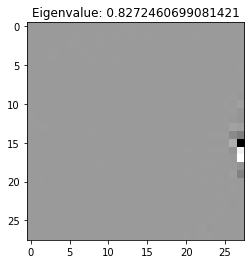

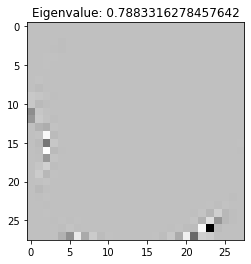

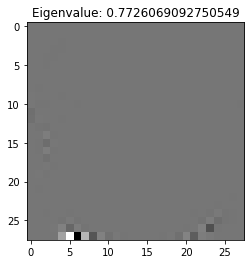

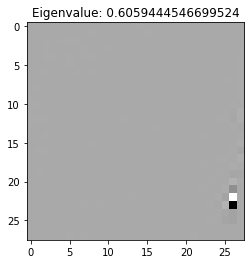

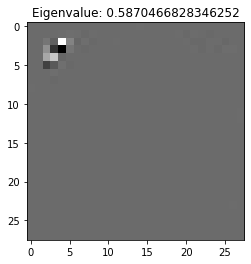

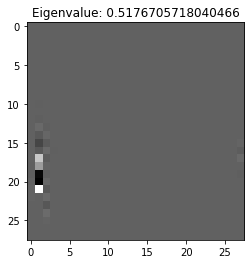

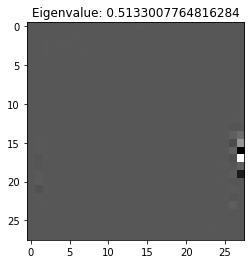

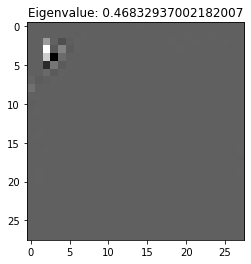

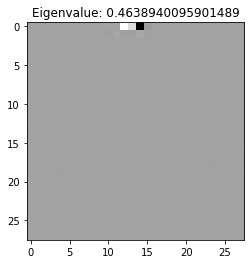

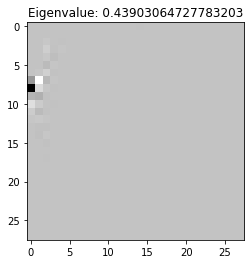

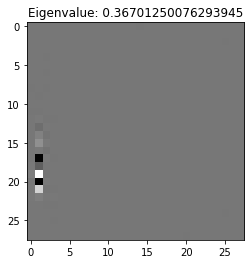

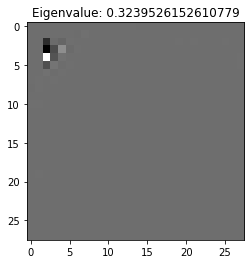

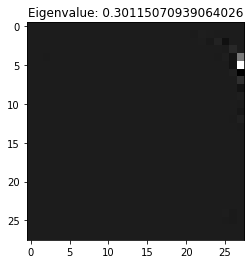

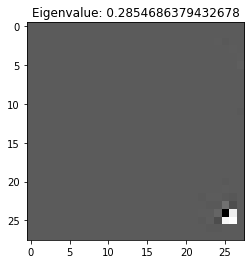

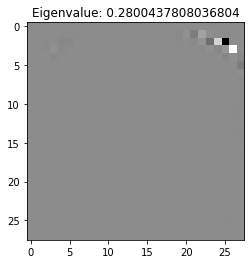

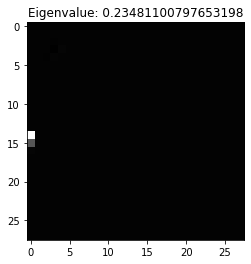

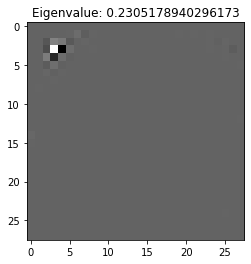

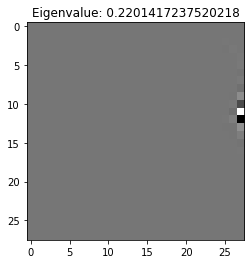

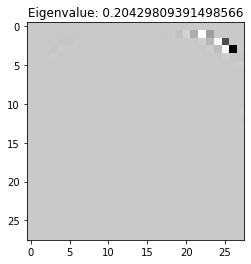

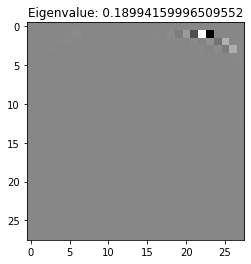

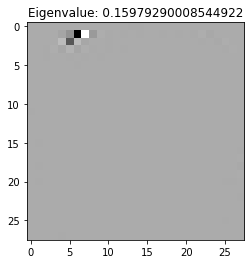

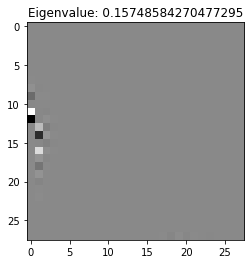

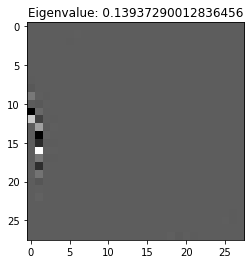

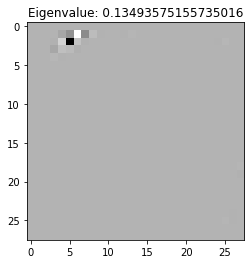

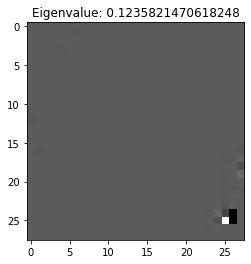

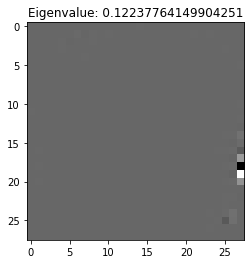

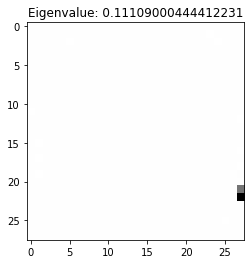

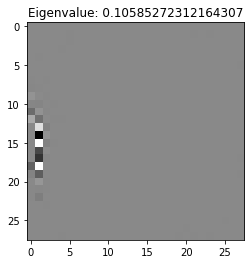

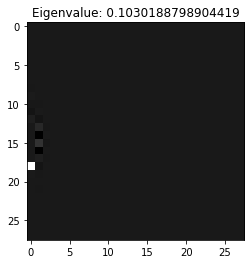

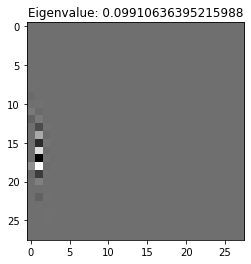

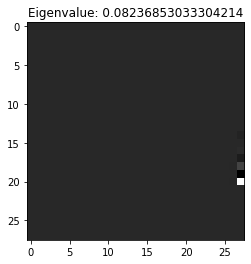

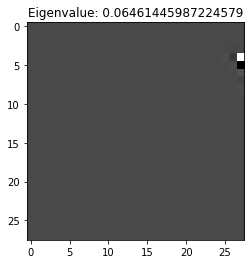

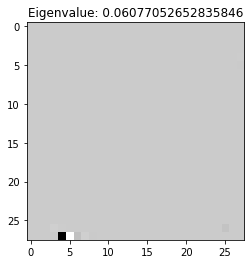

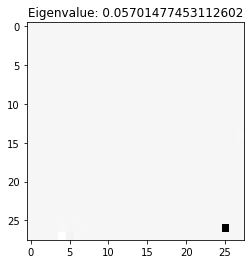

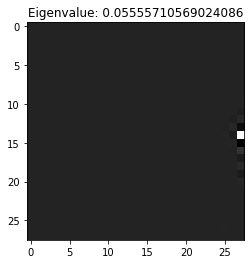

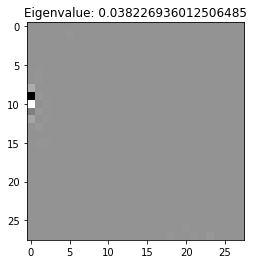

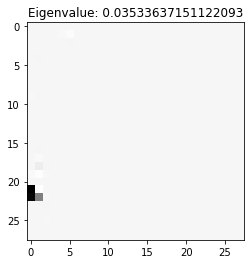

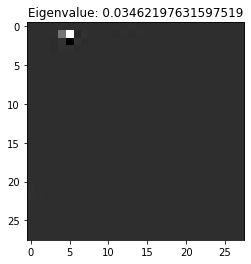

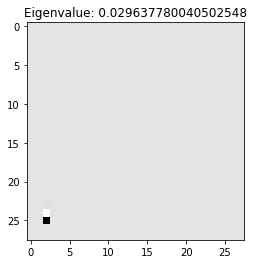

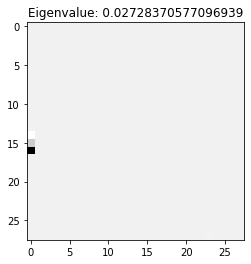

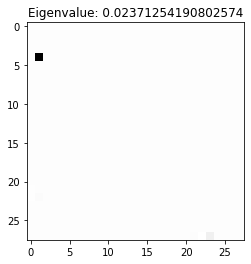

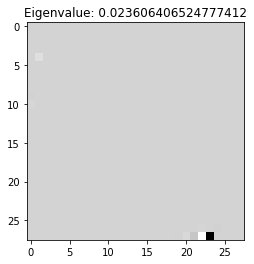

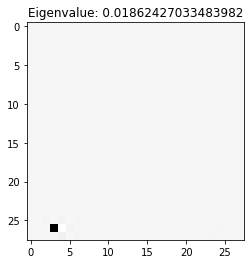

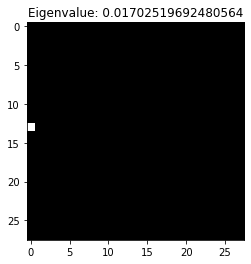

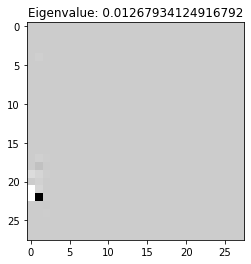

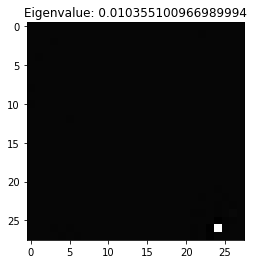

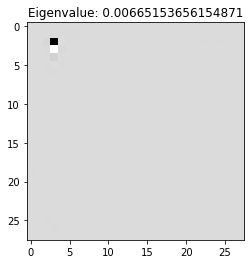

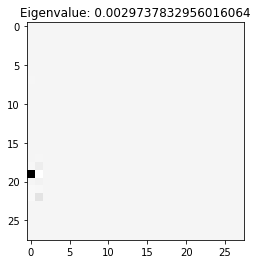

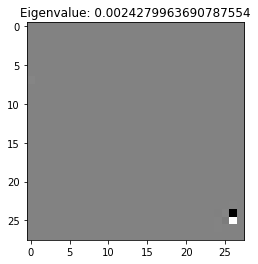

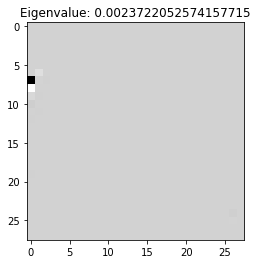

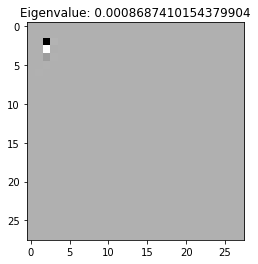

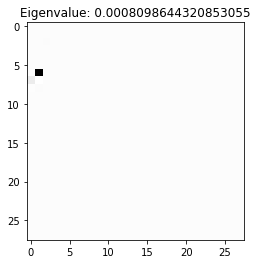

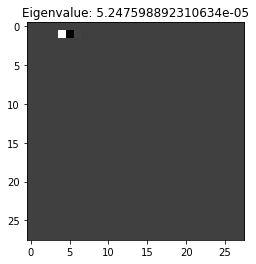

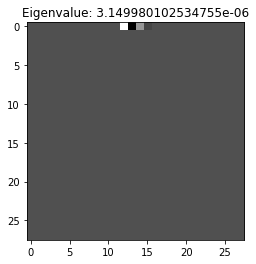

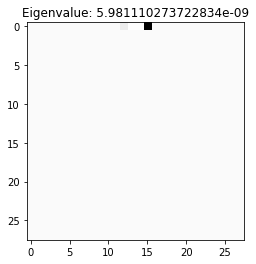

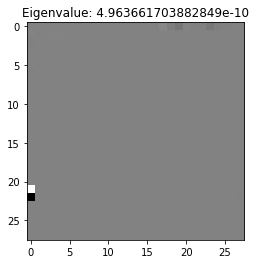

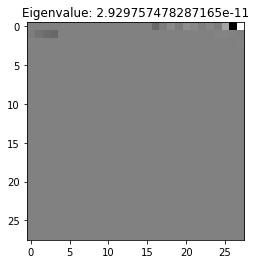

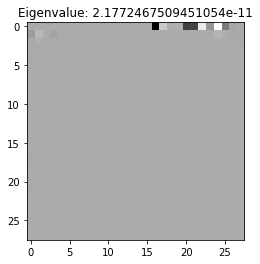

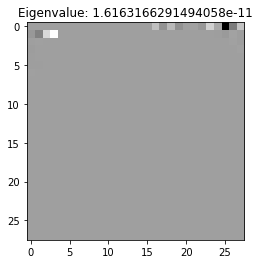

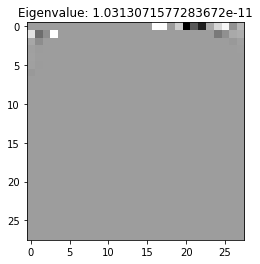

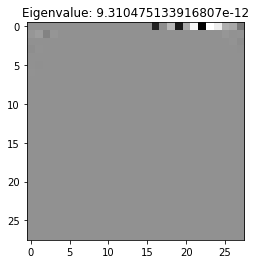

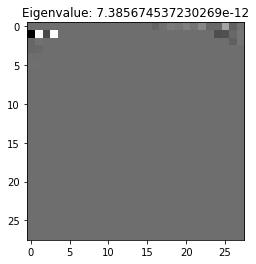

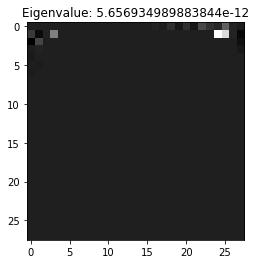

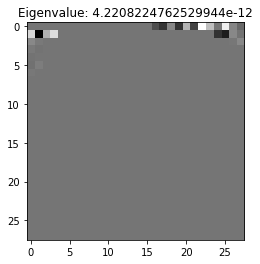

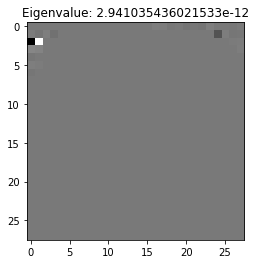

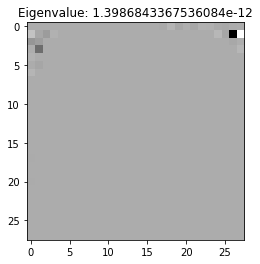

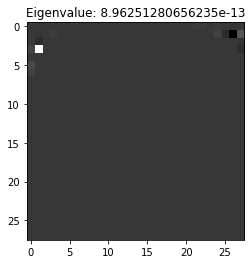

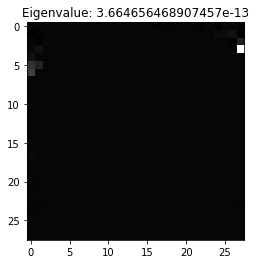

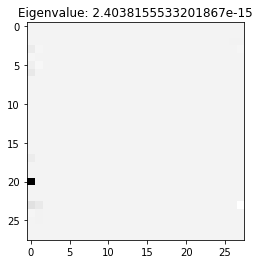

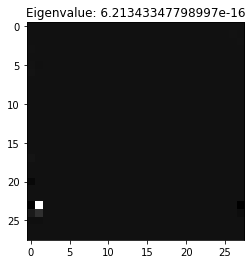

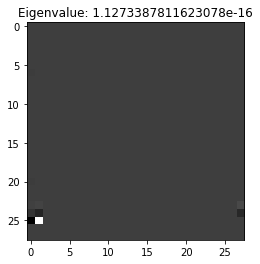

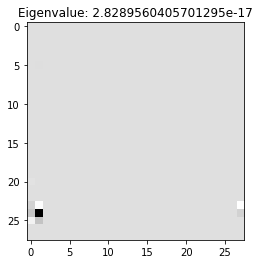

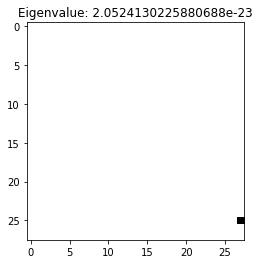

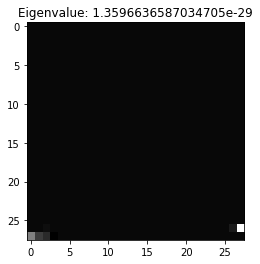

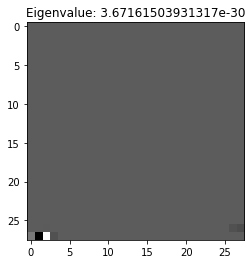

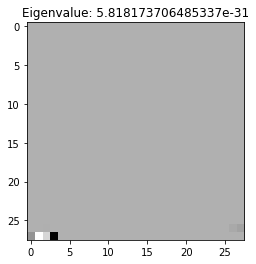

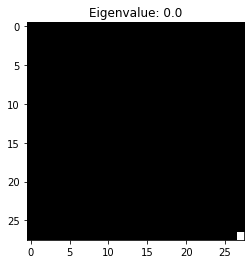

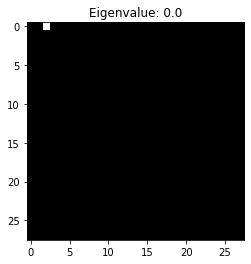

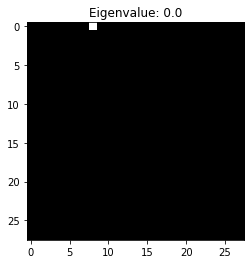

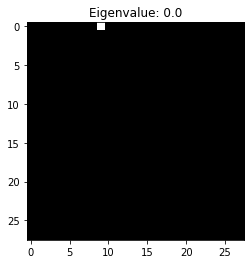

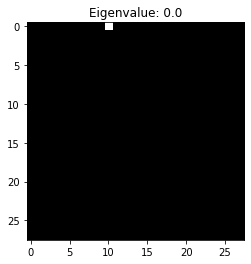

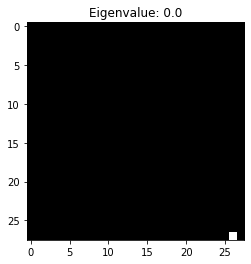

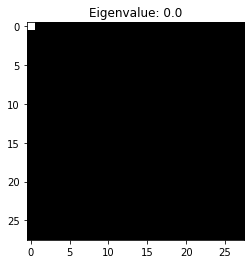

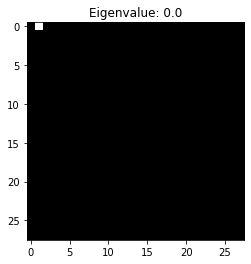

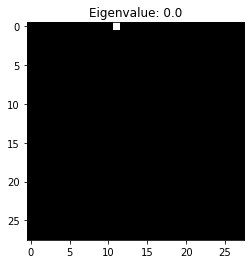

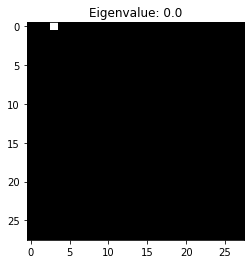

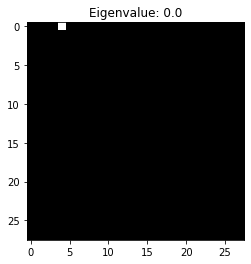

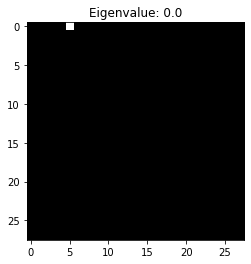

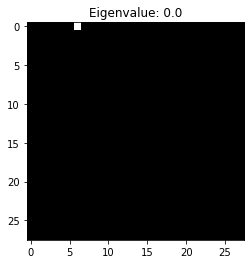

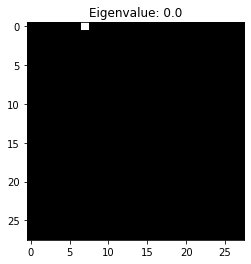

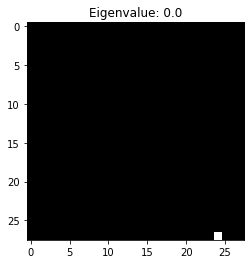

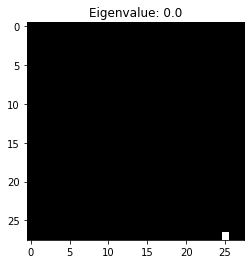

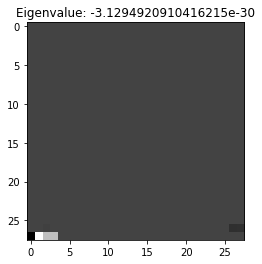

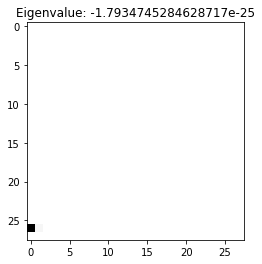

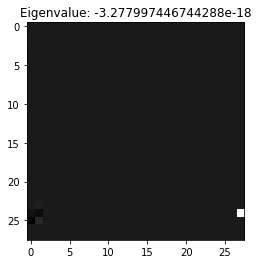

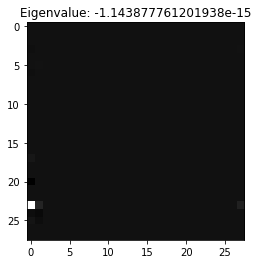

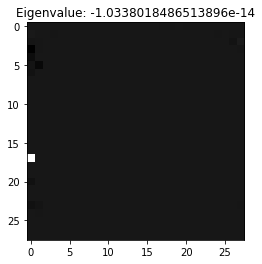

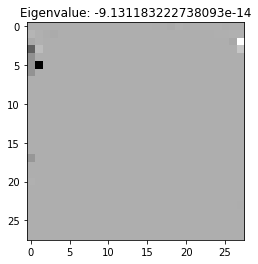

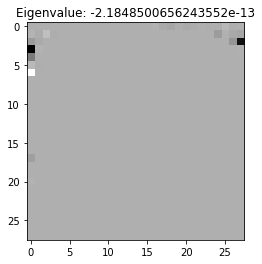

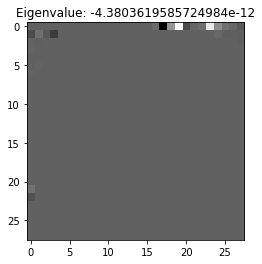

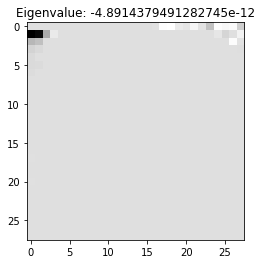

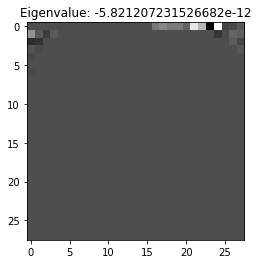

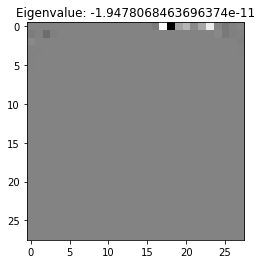

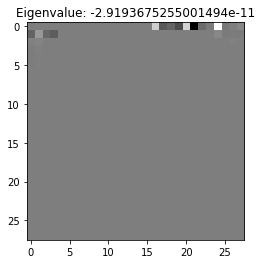

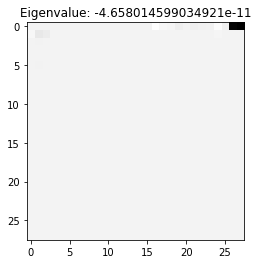

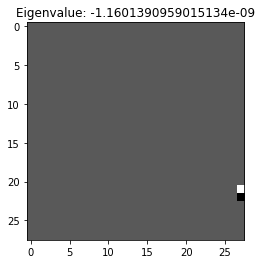

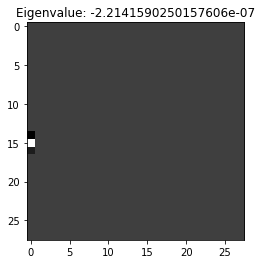

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset
#mndata = MNIST('path_to_mnist_data_directory')
#X_train, _ = mndata.load_training()

# Convert data to numpy arrays
X_train = np.array(train_images.reshape(60000,28*28), dtype=np.float32)

# Compute mean of the dataset
mean = np.mean(X_train, axis=0)

# Subtract mean from each data point
X_train -= mean

# Compute covariance matrix
covariance_matrix = np.dot(X_train.T, X_train) / X_train.shape[0]

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort eigenvalues and eigenvectors in descending order
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

# Plot each eigenvector
for i in range(eigenvectors.shape[1]):
    plt.imshow(np.reshape(eigenvectors[:, i], (28, 28)), cmap='gray')
    plt.title(f'Eigenvalue: {eigenvalues[i]}')
    plt.show()